# Análise Exploratória de Dados
Matheus Miranda Brandão

## Imports

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})

In [200]:
df = pd.read_csv('../../datasets/raw/training_data.csv', sep=';')
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,25,Travel_Rarely,685,Research & Development,1,3,Life Sciences,1,350,1,...,80,2,5,3,3,4,2,1,2,0
1,44,Travel_Rarely,1376,Human Resources,1,2,Medical,1,1098,2,...,80,1,24,1,3,20,6,3,6,1
2,27,Travel_Rarely,135,Research & Development,17,4,Life Sciences,1,1405,4,...,80,0,8,2,3,8,2,7,7,1
3,40,Travel_Frequently,580,Sales,5,4,Life Sciences,1,729,4,...,80,1,20,2,3,18,13,1,12,0
4,24,Travel_Rarely,477,Research & Development,24,3,Medical,1,1173,4,...,80,0,6,2,3,4,3,1,2,0


In [201]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1176 non-null   int64 
 1   BusinessTravel            1176 non-null   object
 2   DailyRate                 1176 non-null   int64 
 3   Department                1176 non-null   object
 4   DistanceFromHome          1176 non-null   int64 
 5   Education                 1176 non-null   int64 
 6   EducationField            1176 non-null   object
 7   EmployeeCount             1176 non-null   int64 
 8   EmployeeNumber            1176 non-null   int64 
 9   EnvironmentSatisfaction   1176 non-null   int64 
 10  Gender                    1176 non-null   object
 11  HourlyRate                1176 non-null   int64 
 12  JobInvolvement            1176 non-null   int64 
 13  JobLevel                  1176 non-null   int64 
 14  JobRole                 

In [202]:
def camel_to_snake(col: str) -> str:
    col = ''.join([item if not item.isupper() else '_' + item for item in col])
    return col[1:].lower()

for item in df.columns:
    df.rename(columns={item: camel_to_snake(item)}, inplace=True)
del camel_to_snake
    
df.business_travel.replace(r'_', ' ', regex=True, inplace=True)

In [203]:
df.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,...,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,attrition
0,25,Travel Rarely,685,Research & Development,1,3,Life Sciences,1,350,1,...,80,2,5,3,3,4,2,1,2,0
1,44,Travel Rarely,1376,Human Resources,1,2,Medical,1,1098,2,...,80,1,24,1,3,20,6,3,6,1
2,27,Travel Rarely,135,Research & Development,17,4,Life Sciences,1,1405,4,...,80,0,8,2,3,8,2,7,7,1
3,40,Travel Frequently,580,Sales,5,4,Life Sciences,1,729,4,...,80,1,20,2,3,18,13,1,12,0
4,24,Travel Rarely,477,Research & Development,24,3,Medical,1,1173,4,...,80,0,6,2,3,4,3,1,2,0


In [204]:
df.describe(include='object').T

,count,unique,top,freq
business_travel,1176,3,Travel Rarely,828
department,1176,3,Research & Development,764
education_field,1176,6,Life Sciences,472
gender,1176,2,Male,704
job_role,1176,9,Sales Executive,263
marital_status,1176,3,Married,535
over18,1176,1,Y,1176
over_time,1176,2,No,853


In [205]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
age,1176.0,36.964286,9.148817,18.0,30.00,36.0,43.00,60.0
daily_rate,1176.0,801.496599,400.618020,102.0,468.25,801.5,1157.25,1499.0
distance_from_home,1176.0,9.097789,8.002540,1.0,2.00,7.0,14.00,29.0
education,1176.0,2.917517,1.022720,1.0,2.00,3.0,4.00,5.0
employee_count,1176.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
employee_number,1176.0,1038.992347,599.144223,1.0,500.75,1040.5,1574.50,2065.0
environment_satisfaction,1176.0,2.728741,1.096404,1.0,2.00,3.0,4.00,4.0
hourly_rate,1176.0,65.398810,20.289856,30.0,48.00,65.0,83.00,100.0
job_involvement,1176.0,2.725340,0.708781,1.0,2.00,3.0,3.00,4.0
job_level,1176.0,2.071429,1.118510,1.0,1.00,2.0,3.00,5.0


In [206]:
df.employee_number.nunique()

1176

In [207]:
# A coluna Over18 só tem um valor, então não é relevante para o modelo
df.drop(columns=['over18'], inplace=True)
# As colunas EmployeeCount e StandardHours só tem um valor, então não é relevante para o modelo
df.drop(columns=['employee_count', 'standard_hours'], inplace=True)
# A coluna EmployeeNumber é apenas um identificador, então não é relevante para o modelo
df.drop(columns=['employee_number'], inplace=True)

In [208]:
for item in df.select_dtypes('object').columns:
    df[item] = df[item].astype('category').cat.codes
    
for item in df.select_dtypes('number').columns:
    ok = (df[item] == df[item].astype('int8')).unique()
    if len(ok) == 1:
        df[item] = df[item].astype('int8')
    else:
        df[item] = df[item].astype('int16')

In [209]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         1176 non-null   int8 
 1   business_travel             1176 non-null   int8 
 2   daily_rate                  1176 non-null   int16
 3   department                  1176 non-null   int8 
 4   distance_from_home          1176 non-null   int8 
 5   education                   1176 non-null   int8 
 6   education_field             1176 non-null   int8 
 7   environment_satisfaction    1176 non-null   int8 
 8   gender                      1176 non-null   int8 
 9   hourly_rate                 1176 non-null   int8 
 10  job_involvement             1176 non-null   int8 
 11  job_level                   1176 non-null   int8 
 12  job_role                    1176 non-null   int8 
 13  job_satisfaction            1176 non-null   int8 
 14  marital_

In [210]:
# Necessário rebalancear os dados, pois a classe 0 é muito maior que a classe 1
pd.DataFrame([df.attrition.value_counts(), df.attrition.value_counts(normalize=True)]).T

,count,proportion
attrition,,
0,986.0,0.838435
1,190.0,0.161565


In [211]:
def plot_histograms(df: pd.DataFrame, column: str, title: str) -> None:
    fig = plt.figure(figsize=(20, 16))
    for i, title in enumerate([title, title + ' separados pelo Atrito']):
        ax = fig.add_subplot(2, 1, i + 1)
        if i:
            sns.histplot(data=df, x=column, ax=ax, hue='attrition', bins=20, kde=True, alpha=.75)
            ax.legend(title="Attrition", loc="upper right", labels=["True", "False"])
        else:
            sns.histplot(data=df, x=column, ax=ax, bins=20, kde=True, color='#384f35', alpha=.75)
        for value in ax.containers:
            ax.bar_label(value, label_type='edge', fontsize=9, family='monospace')
        ax.set_xlabel(None)
        ax.set_ylabel('Contagem', fontsize='large', family='monospace')
        ax.set_title(title, fontsize='large', fontweight='bold', style='italic', family='monospace')
    fig.tight_layout()

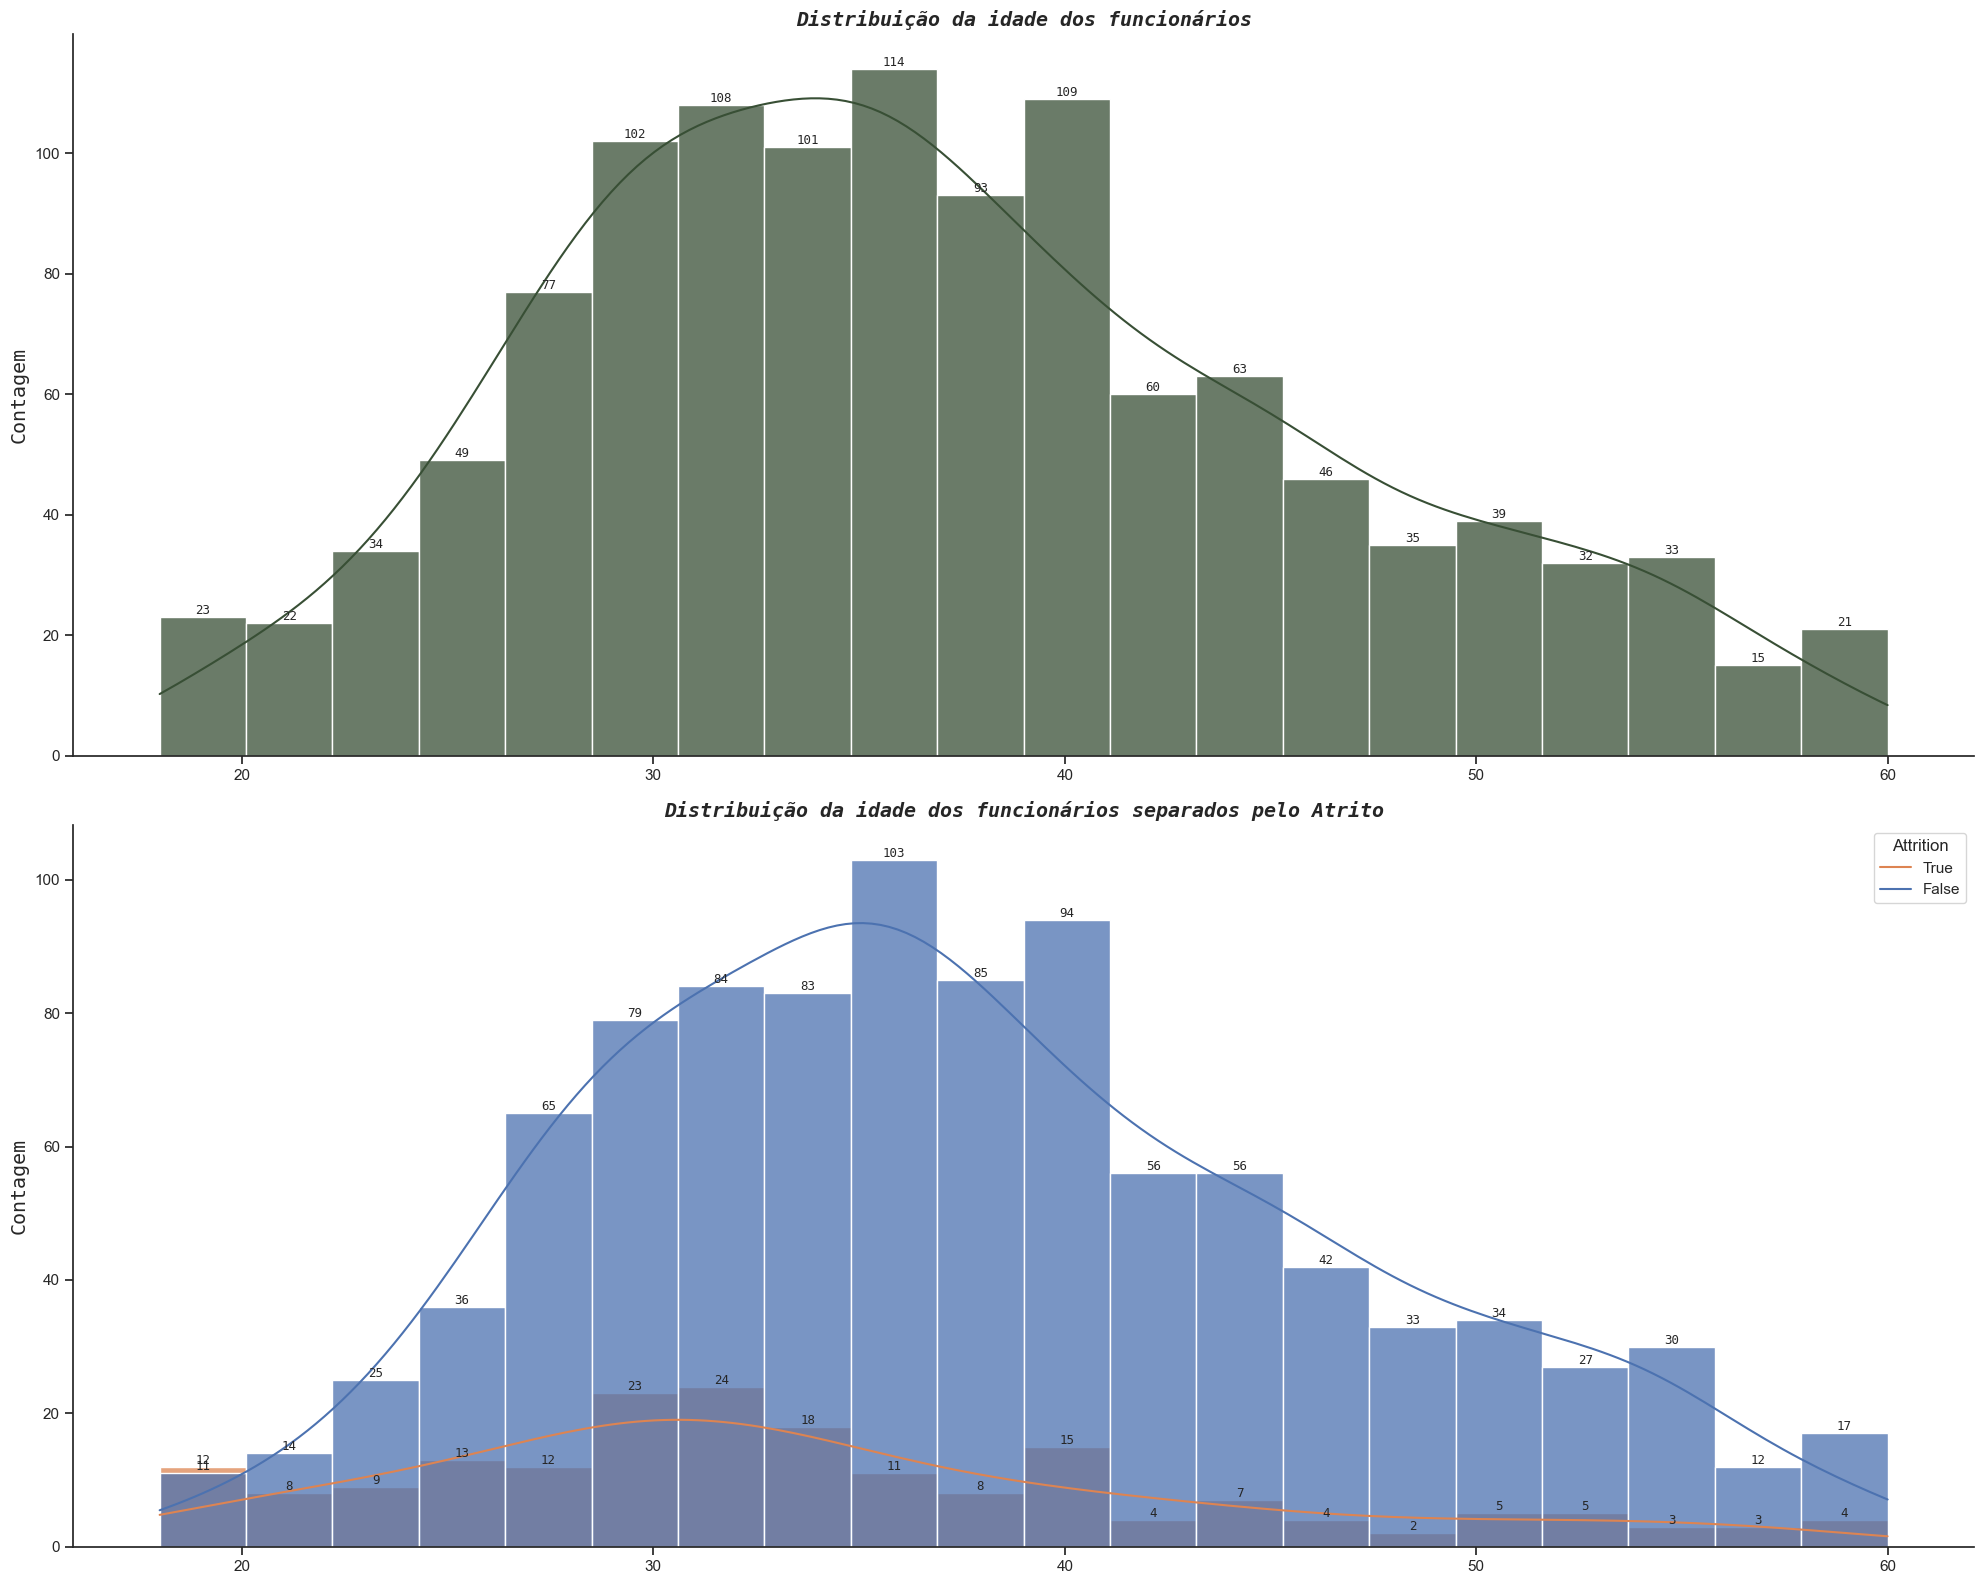

In [212]:
# Comportamento semelhante a uma distribuição normal
plot_histograms(df, 'age', 'Distribuição da idade dos funcionários')
plt.show()

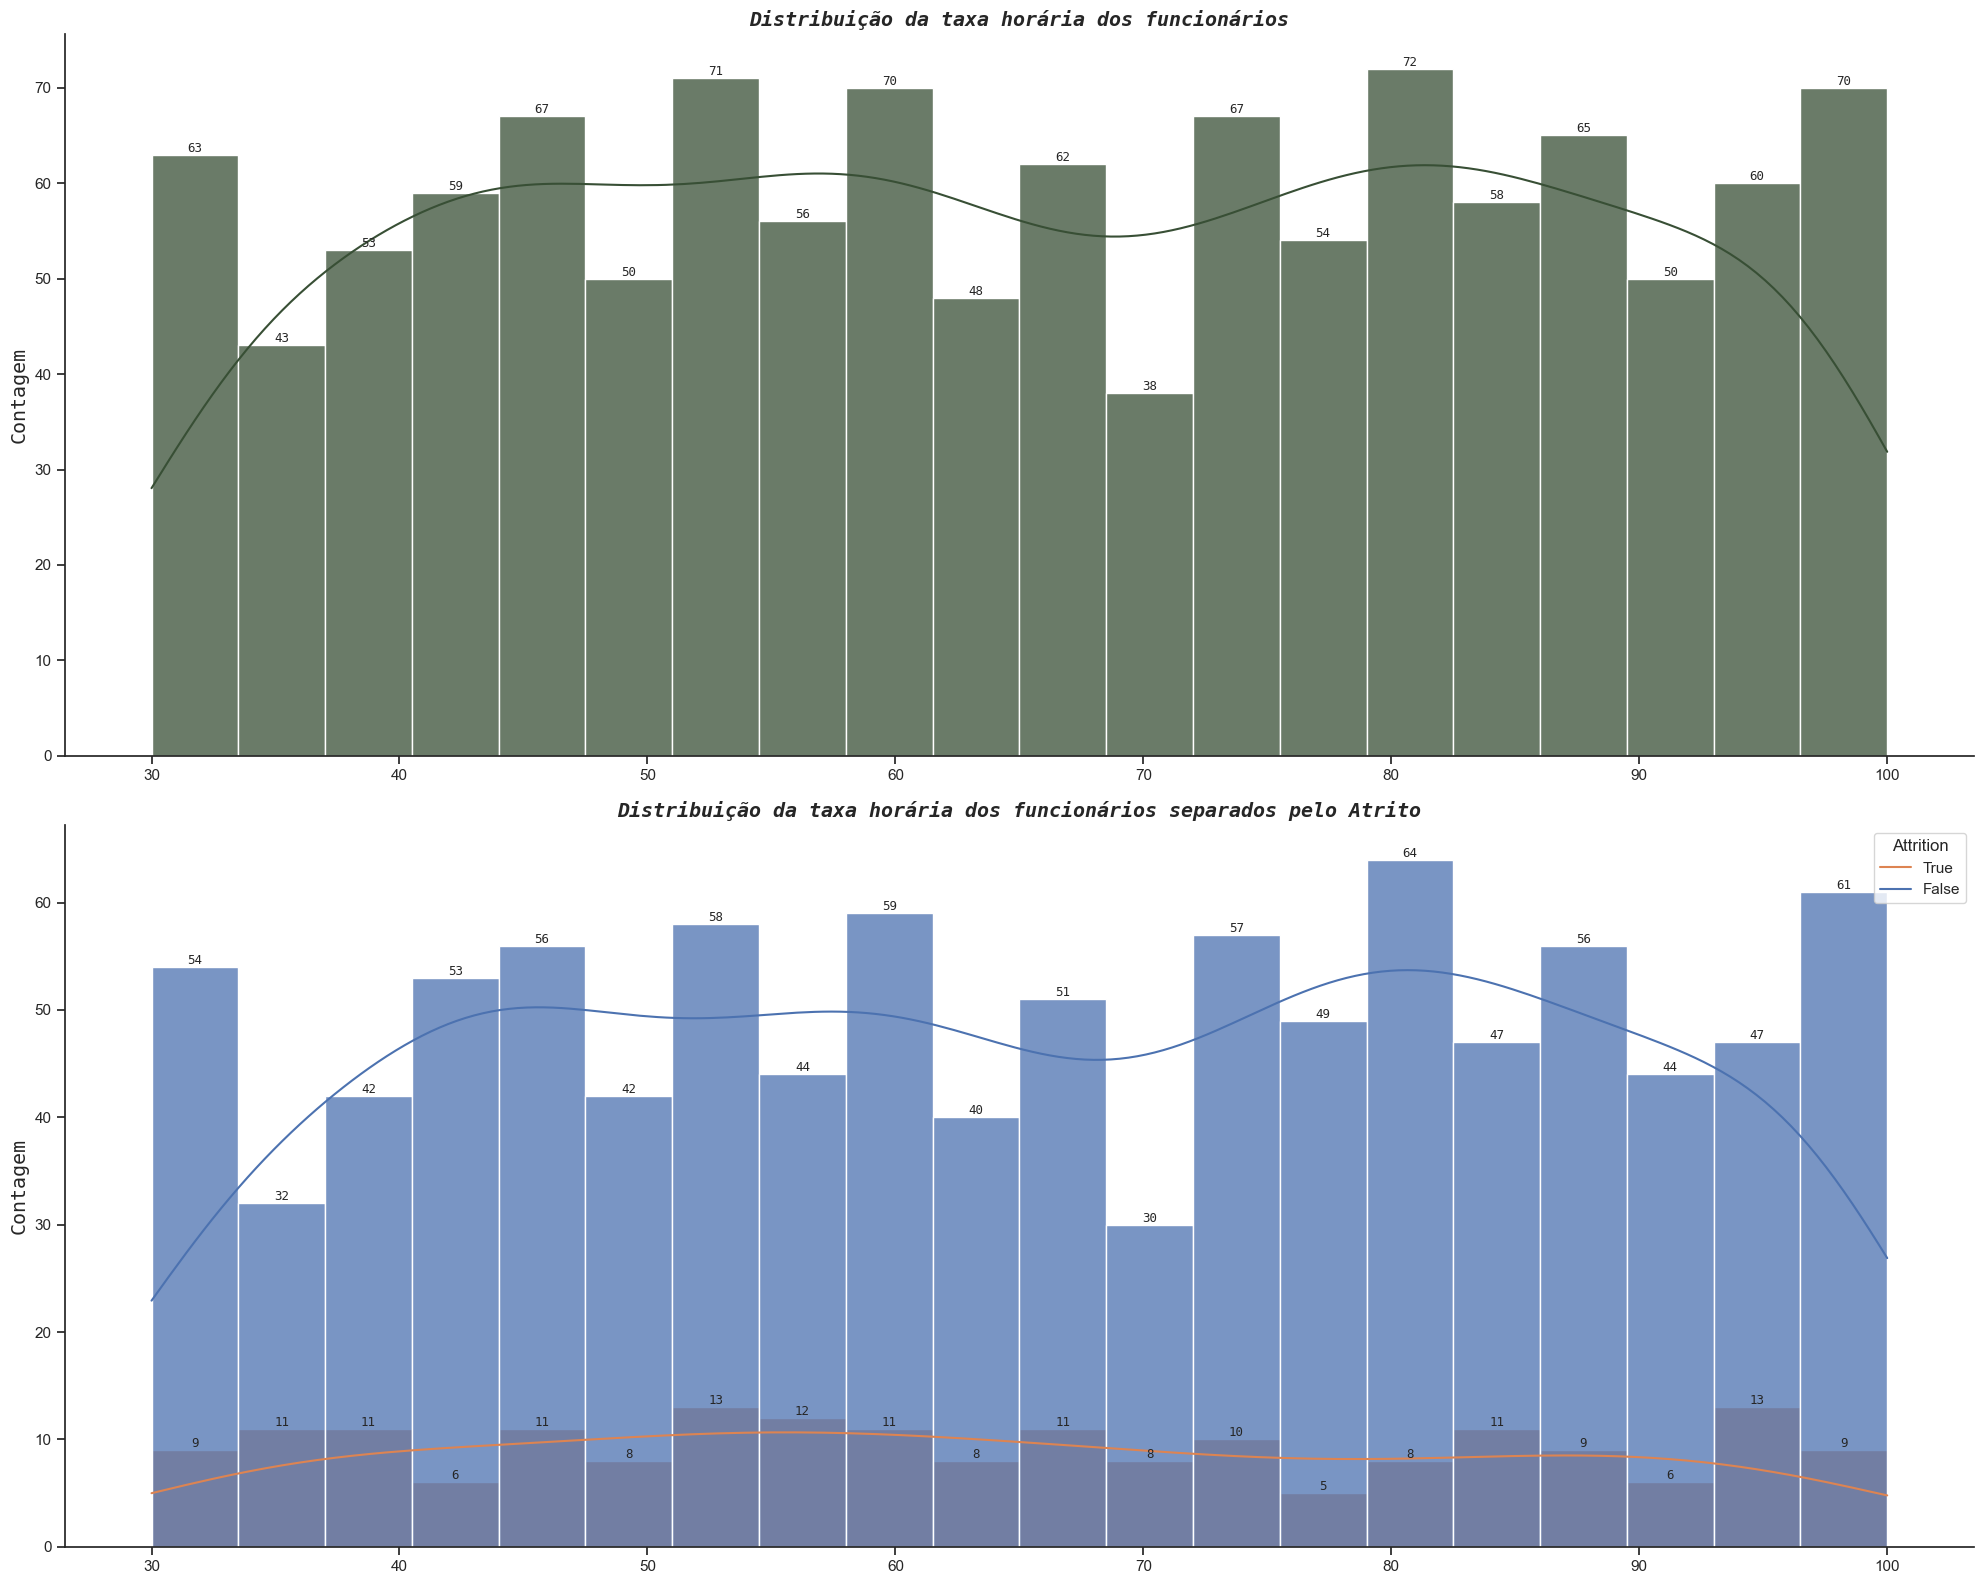

In [213]:
plot_histograms(df, 'hourly_rate', 'Distribuição da taxa horária dos funcionários')
plt.show()

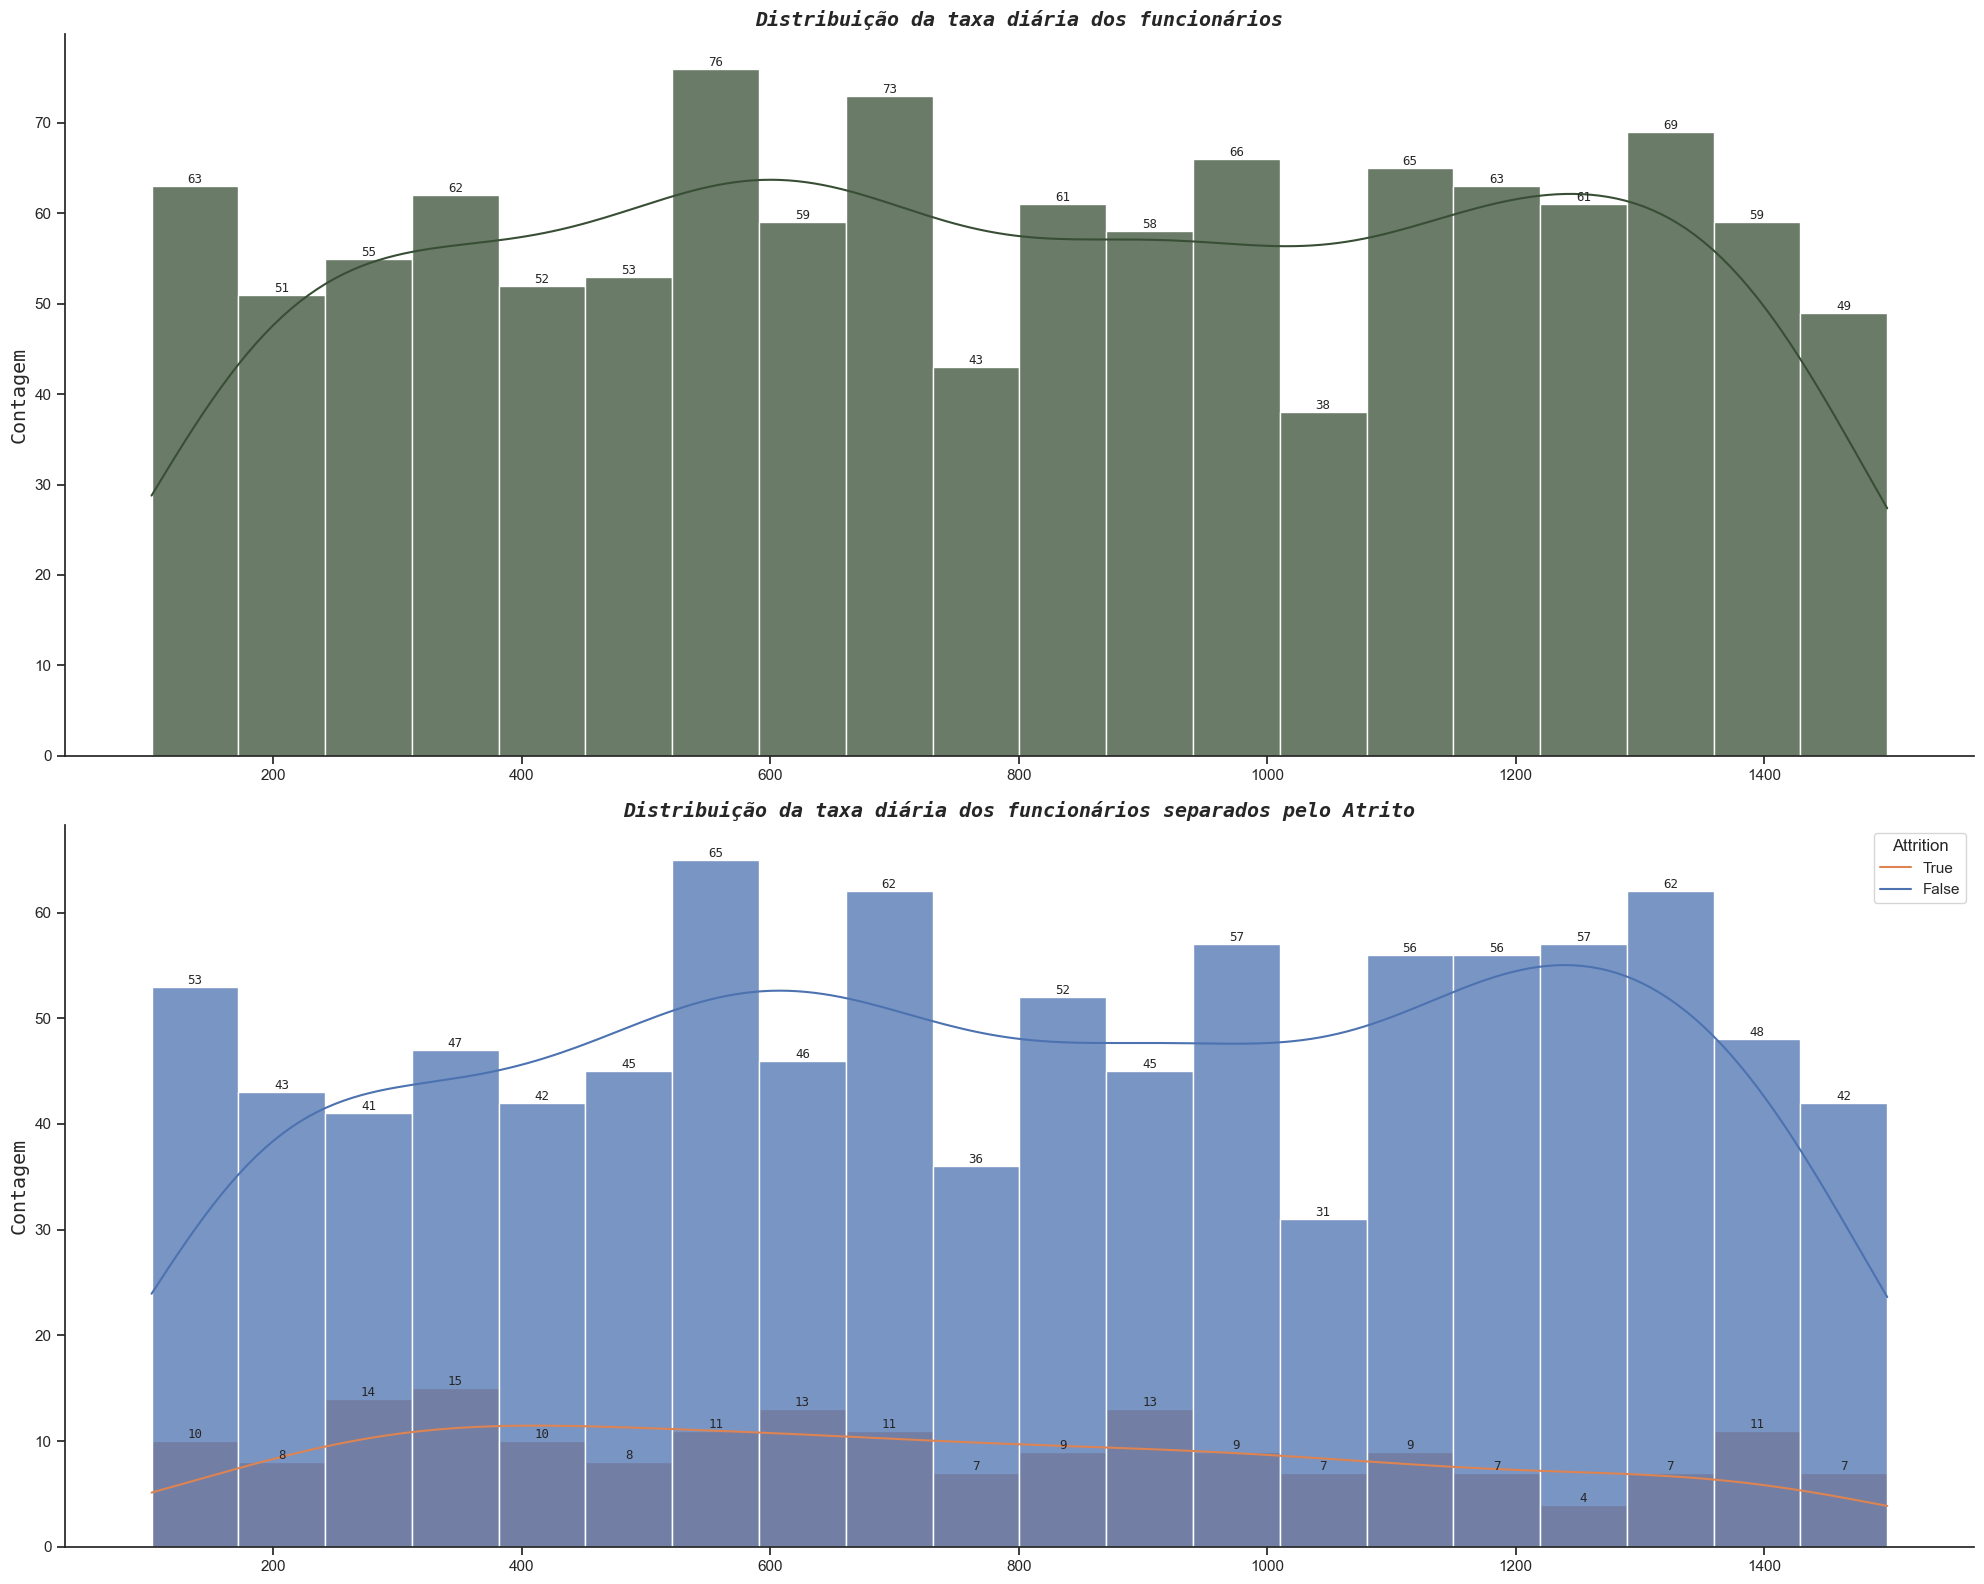

In [214]:
plot_histograms(df, 'daily_rate', 'Distribuição da taxa diária dos funcionários')
plt.show()

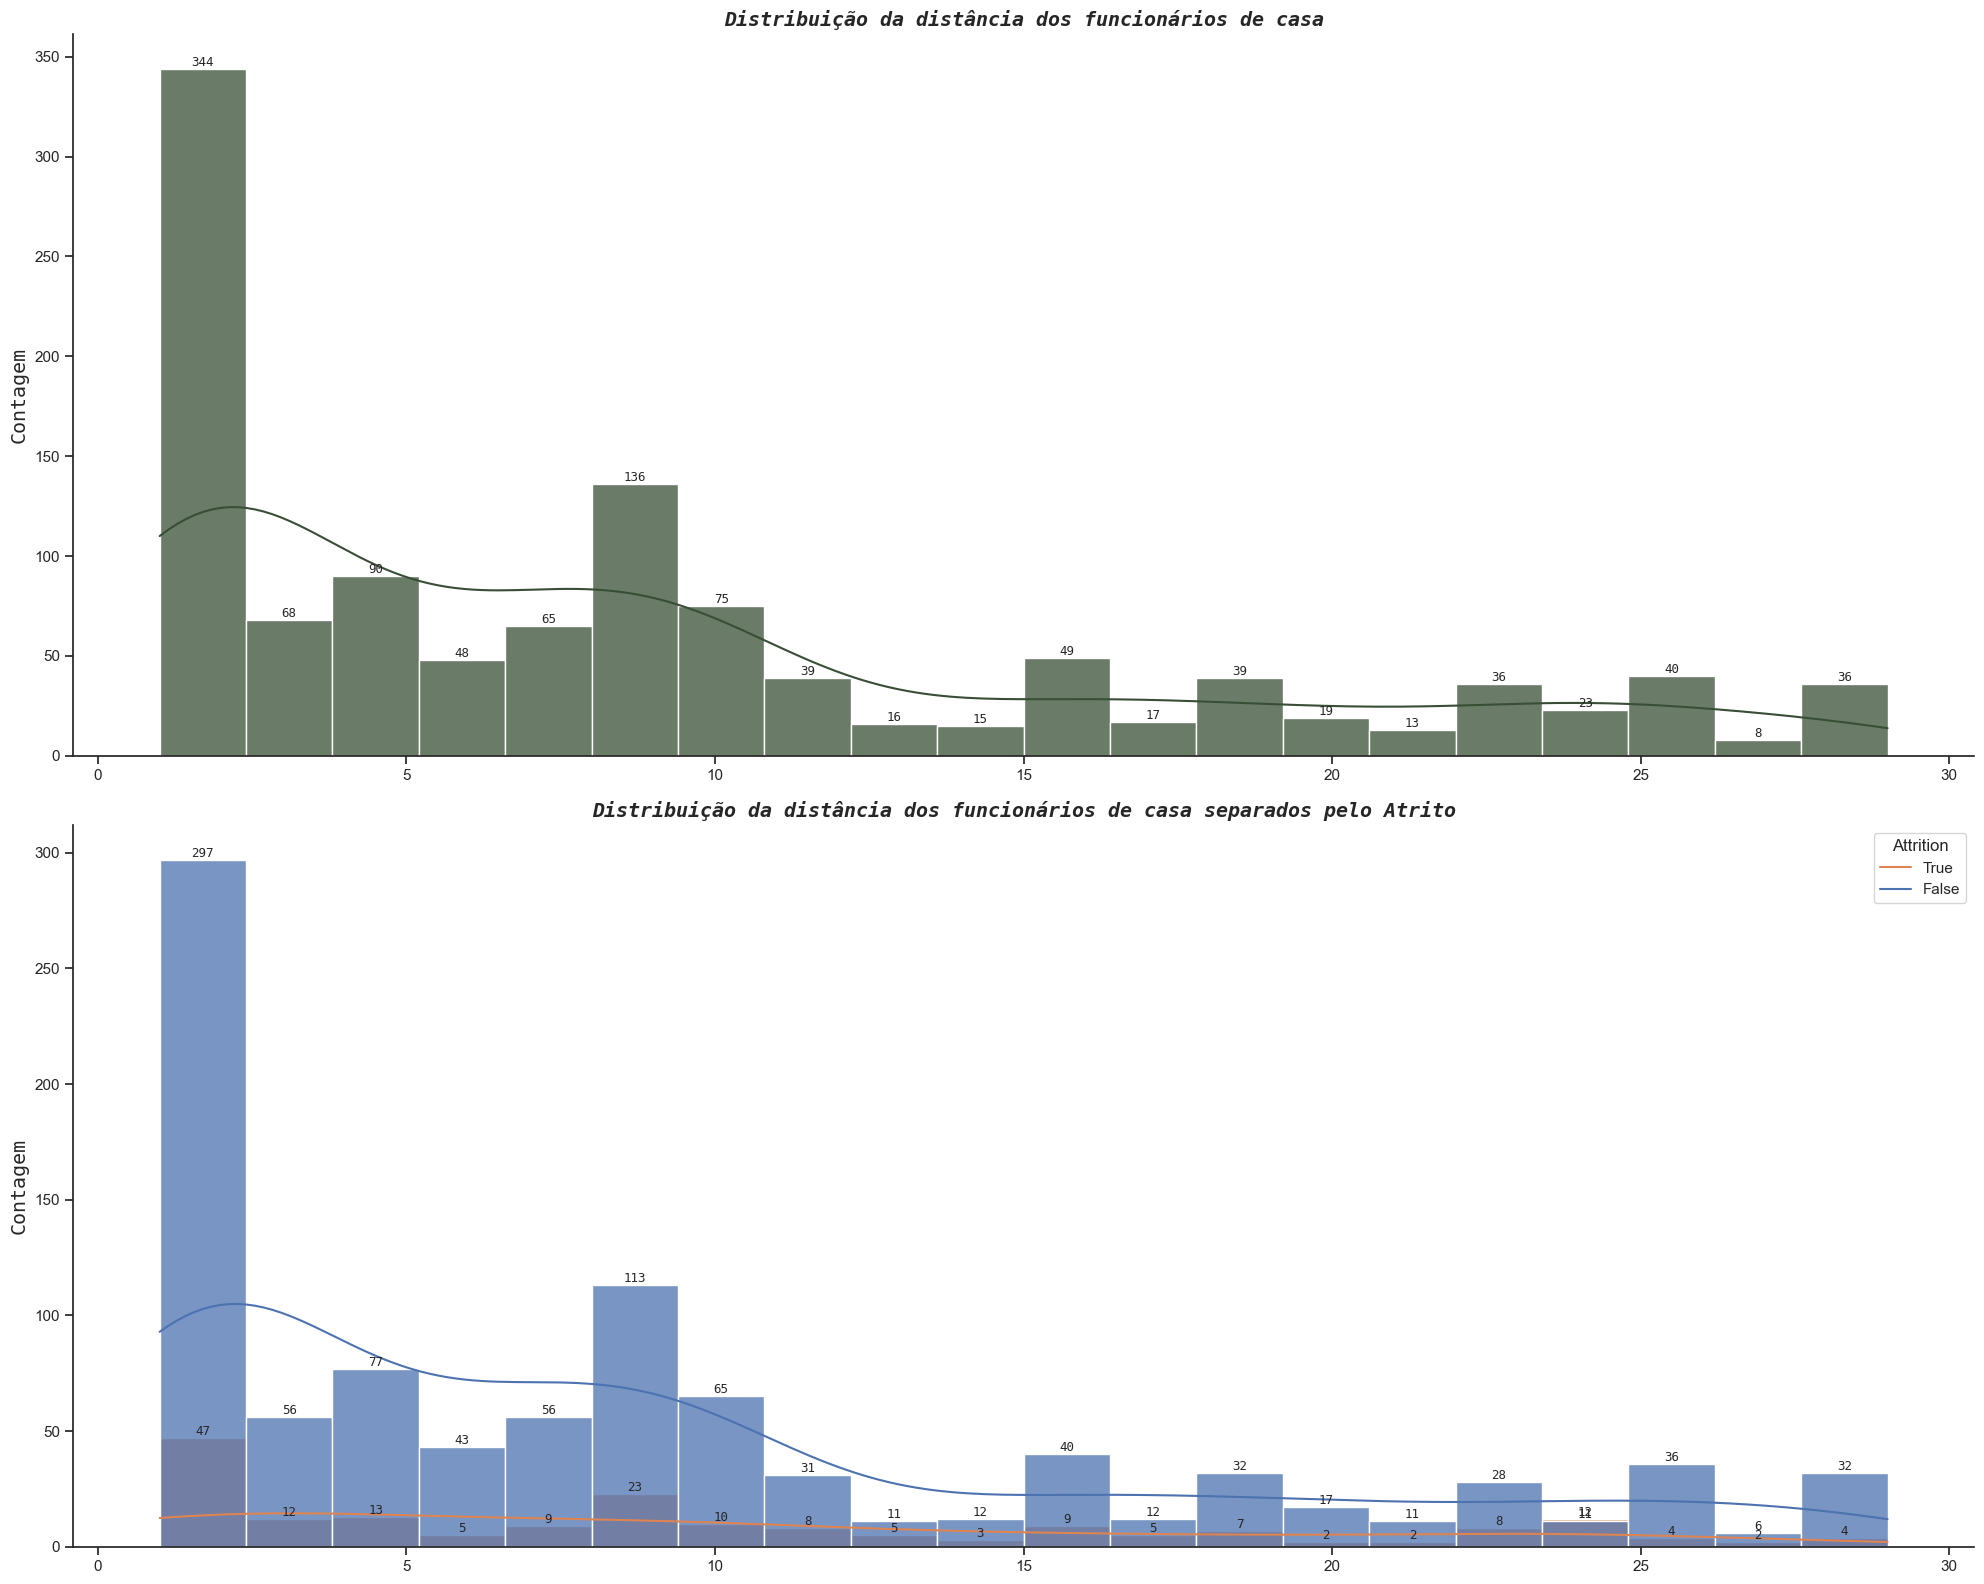

In [215]:
plot_histograms(df, 'distance_from_home', 'Distribuição da distância dos funcionários de casa')
plt.show()

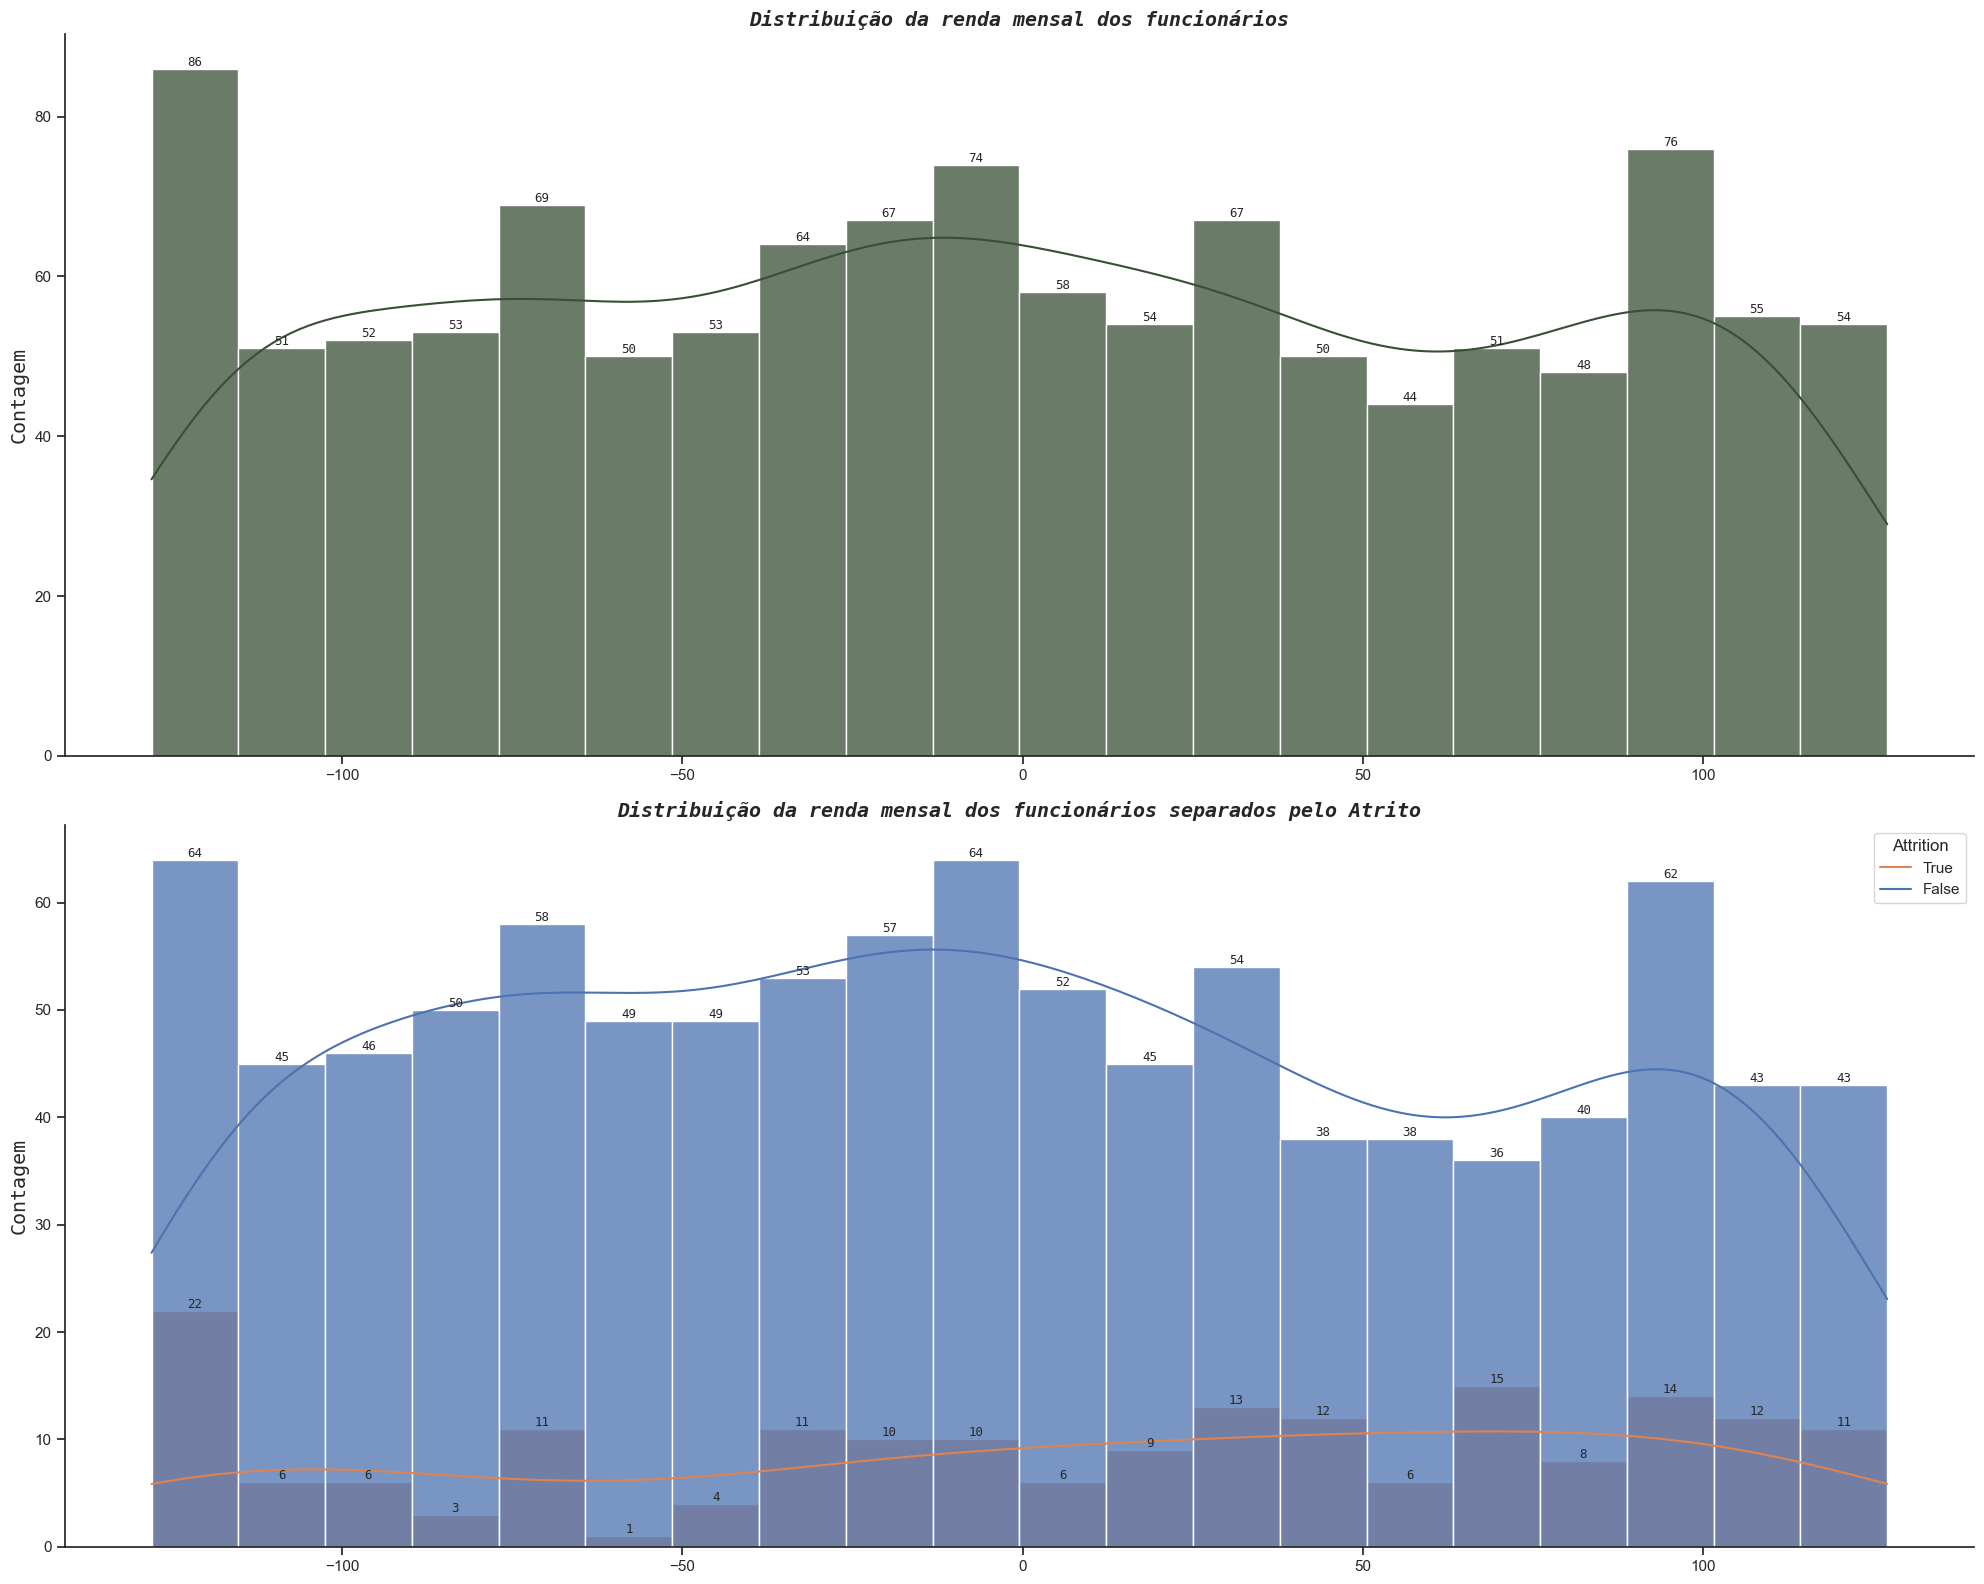

In [216]:
plot_histograms(df, 'monthly_income', 'Distribuição da renda mensal dos funcionários')
plt.show()

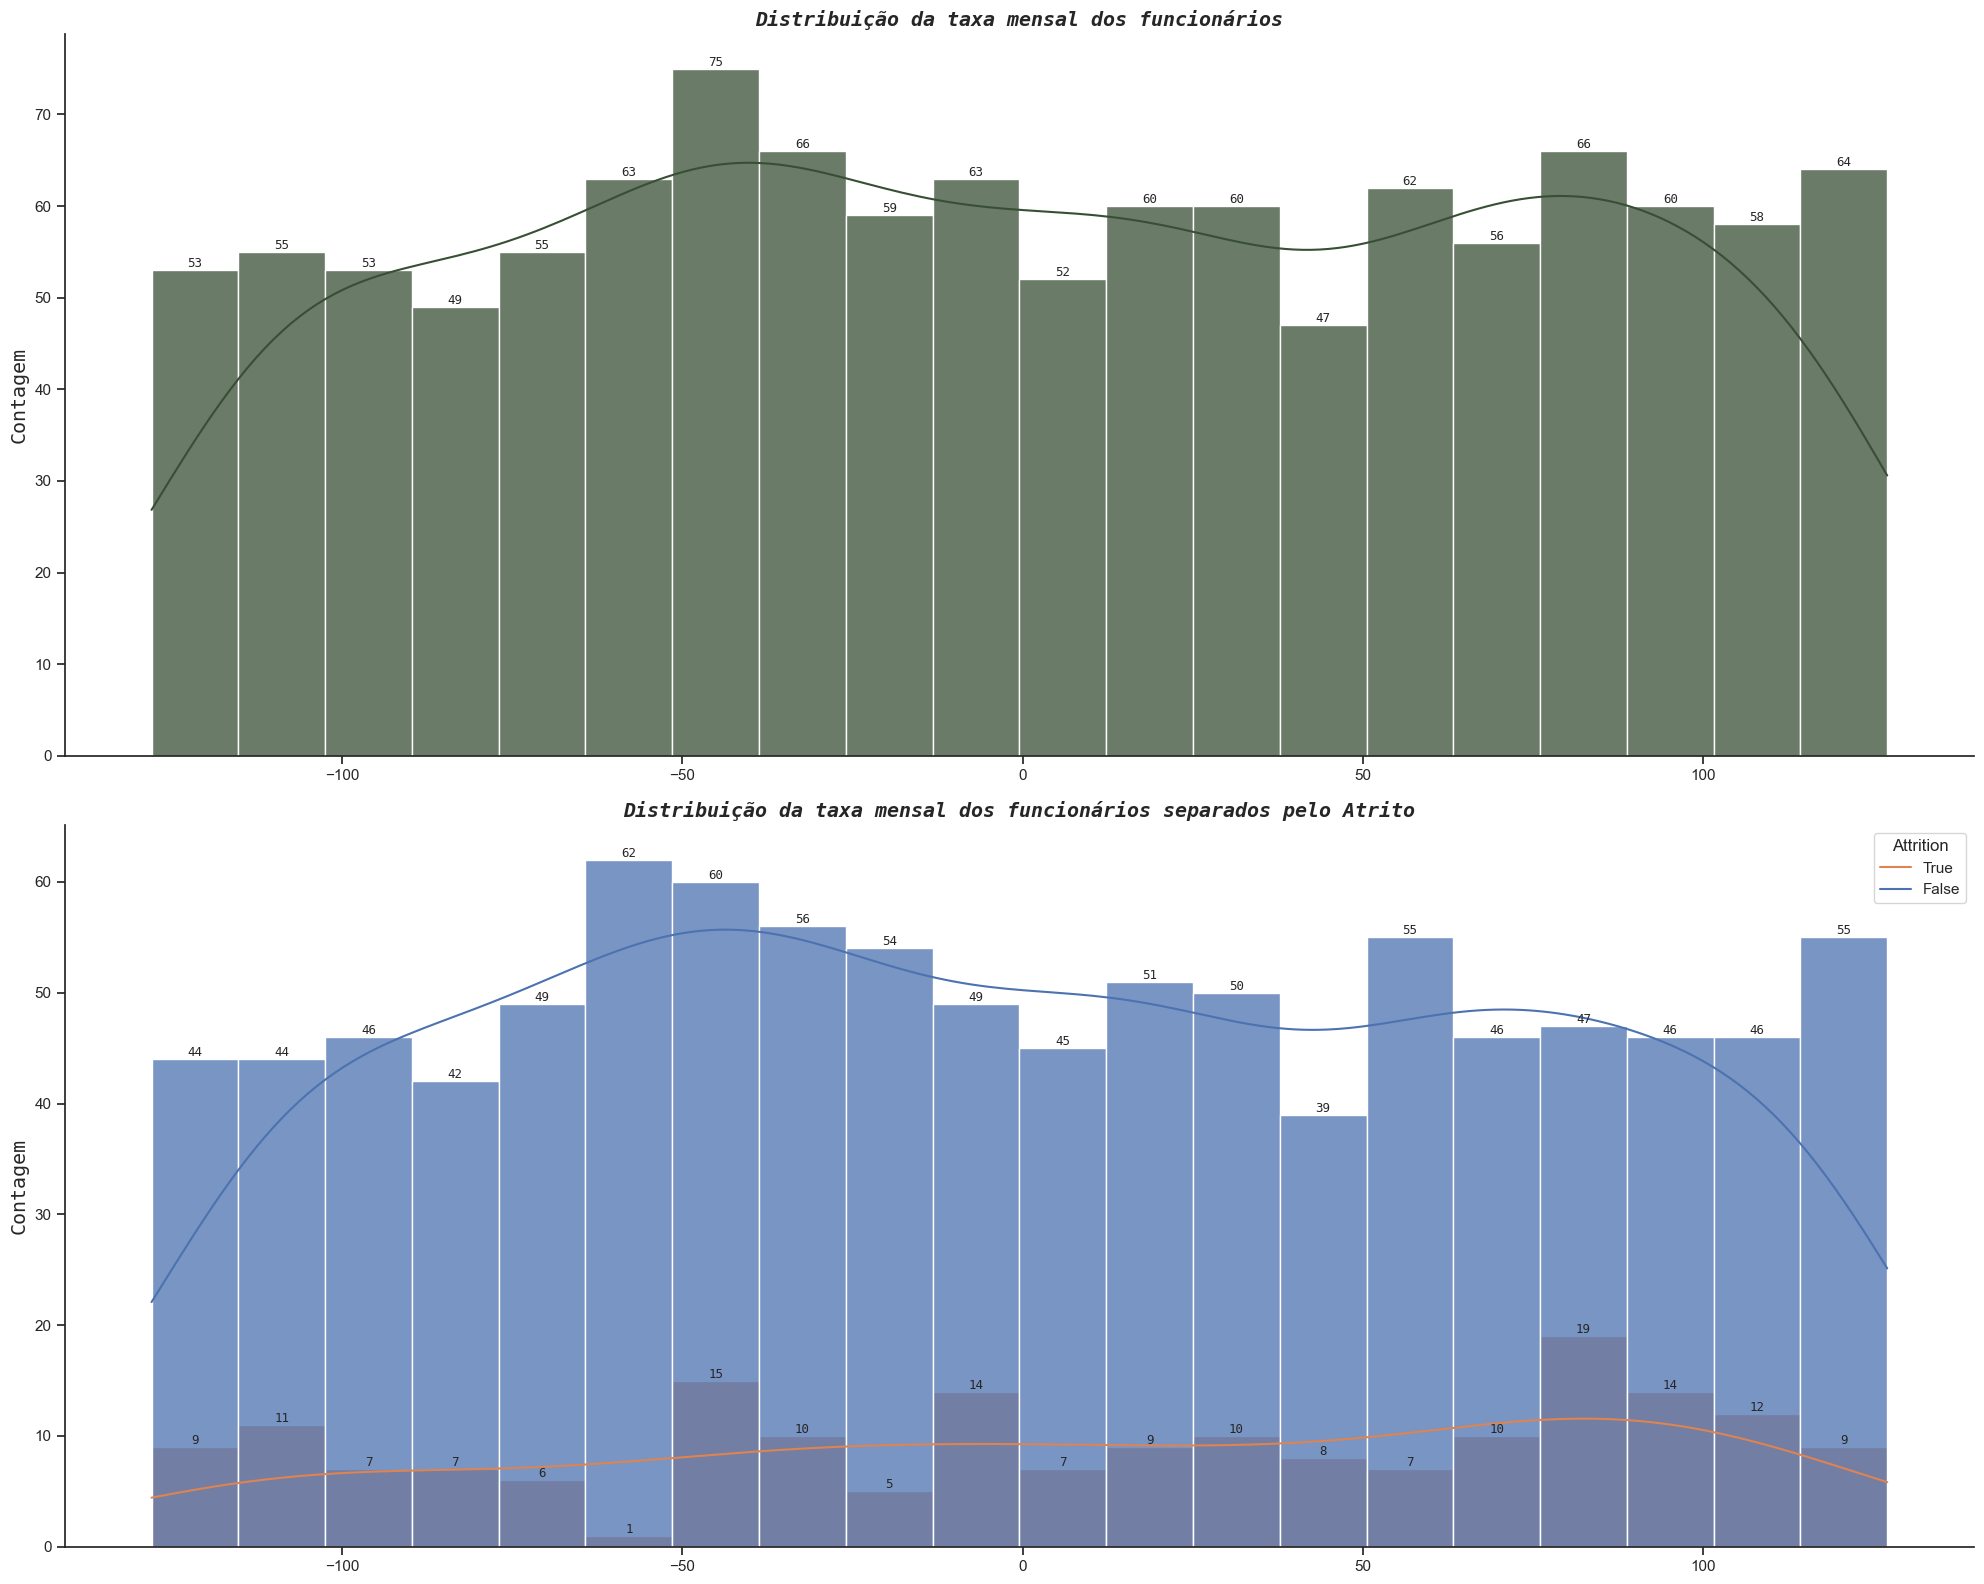

In [217]:
plot_histograms(df, 'monthly_rate', 'Distribuição da taxa mensal dos funcionários')
plt.show()

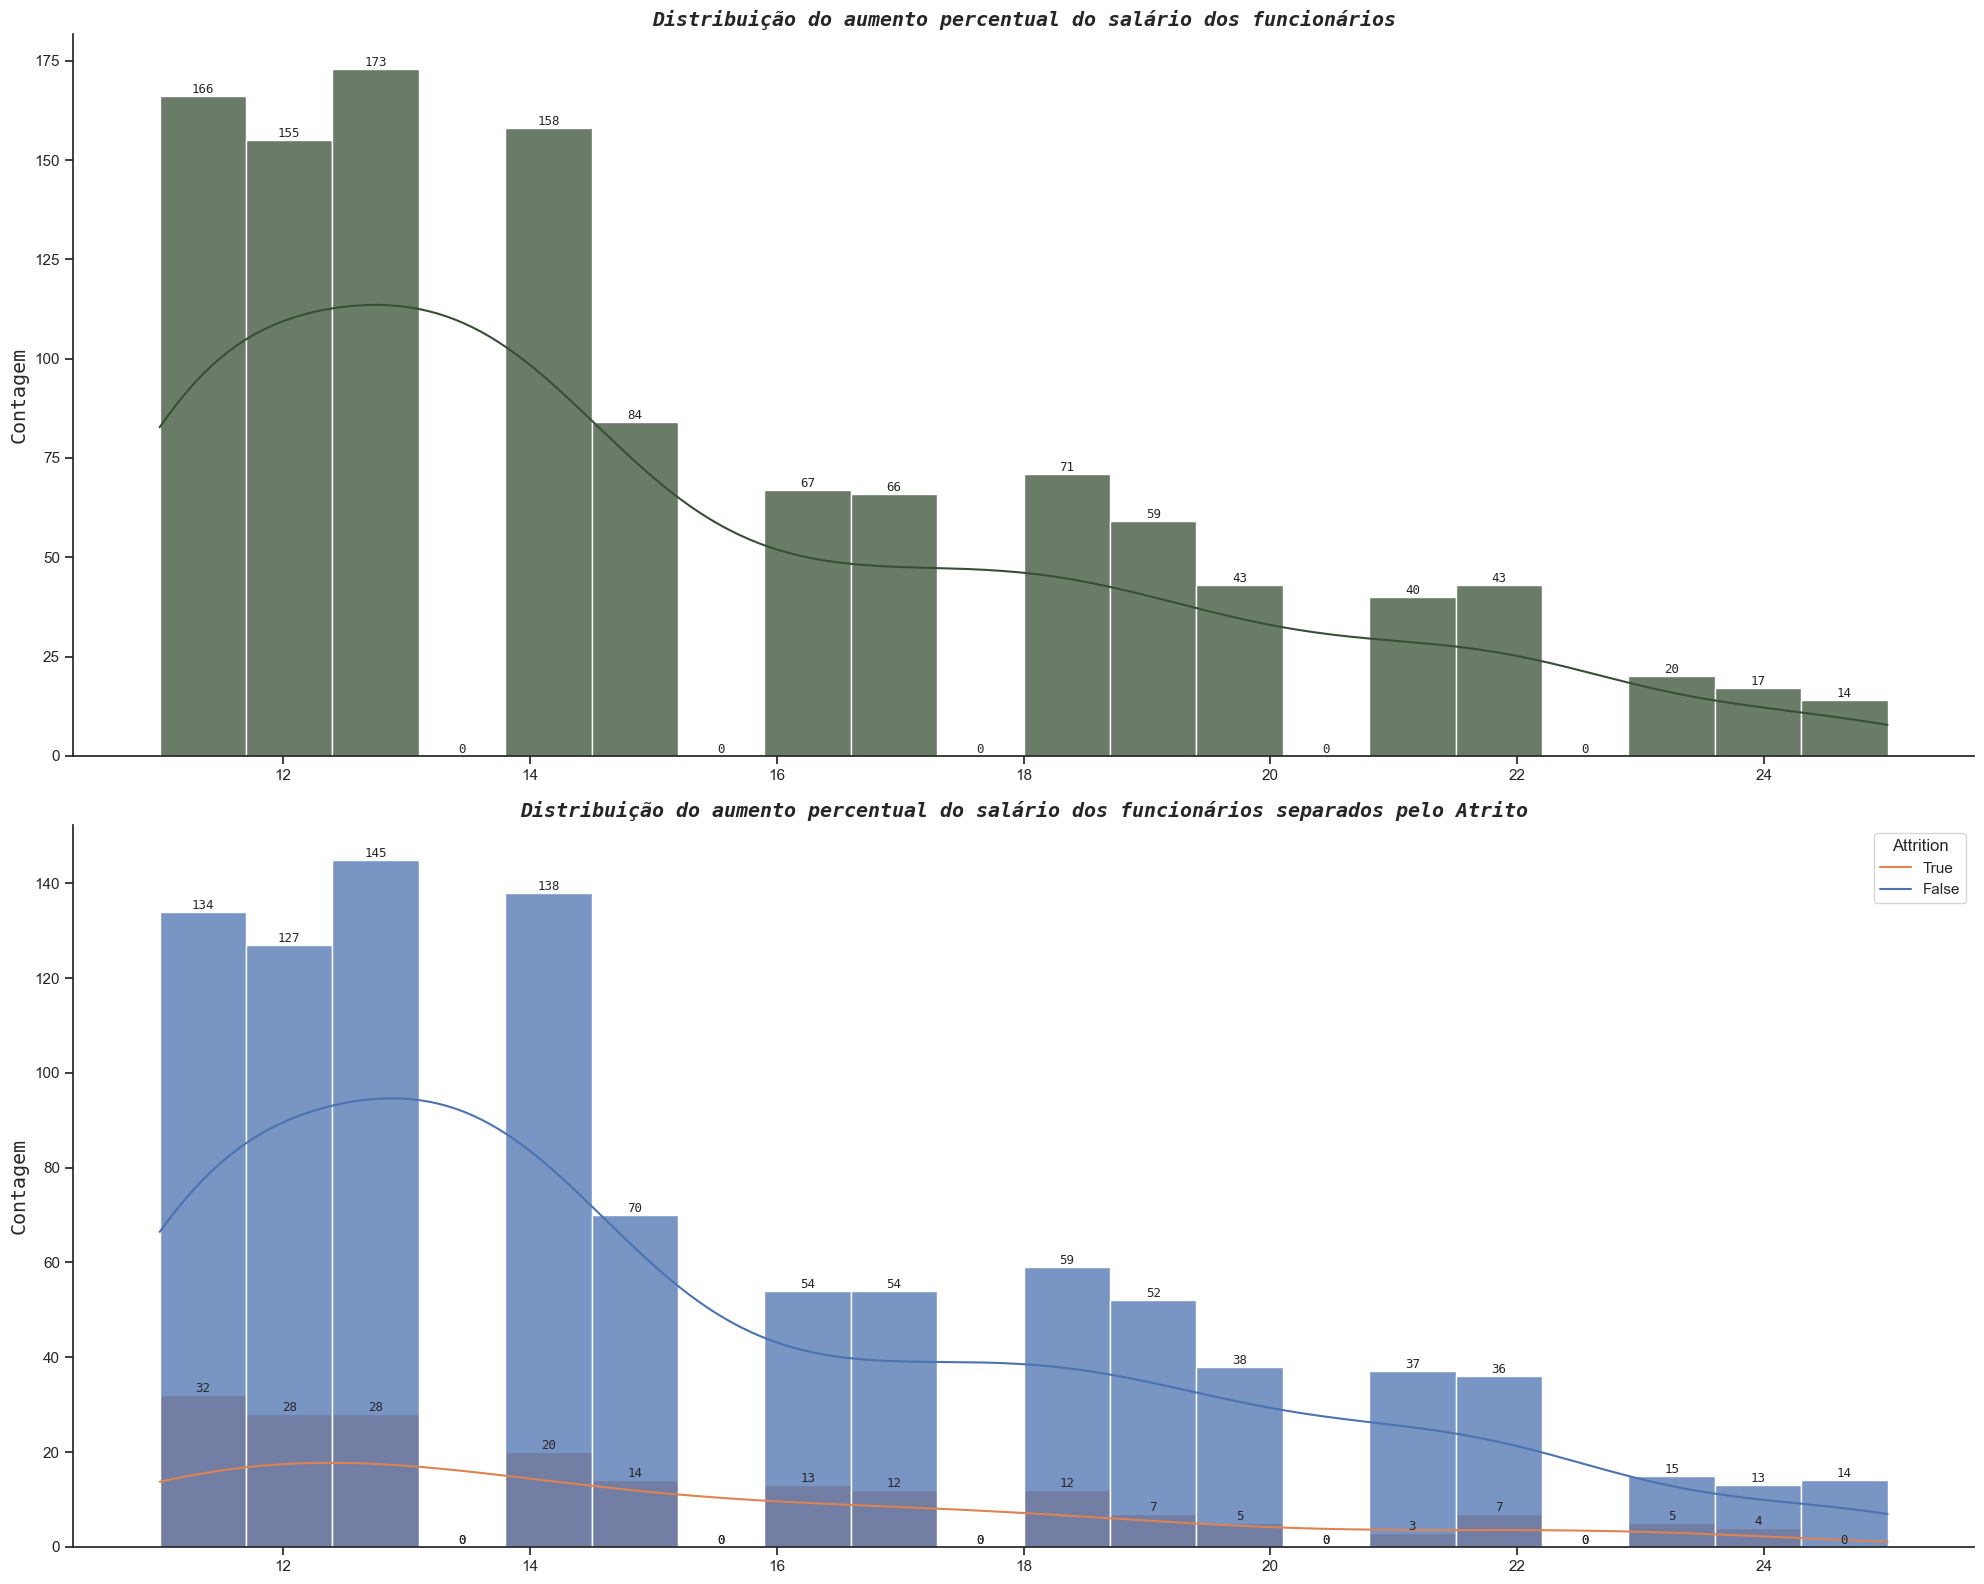

In [218]:
plot_histograms(df, 'percent_salary_hike', 'Distribuição do aumento percentual do salário dos funcionários')
plt.show()

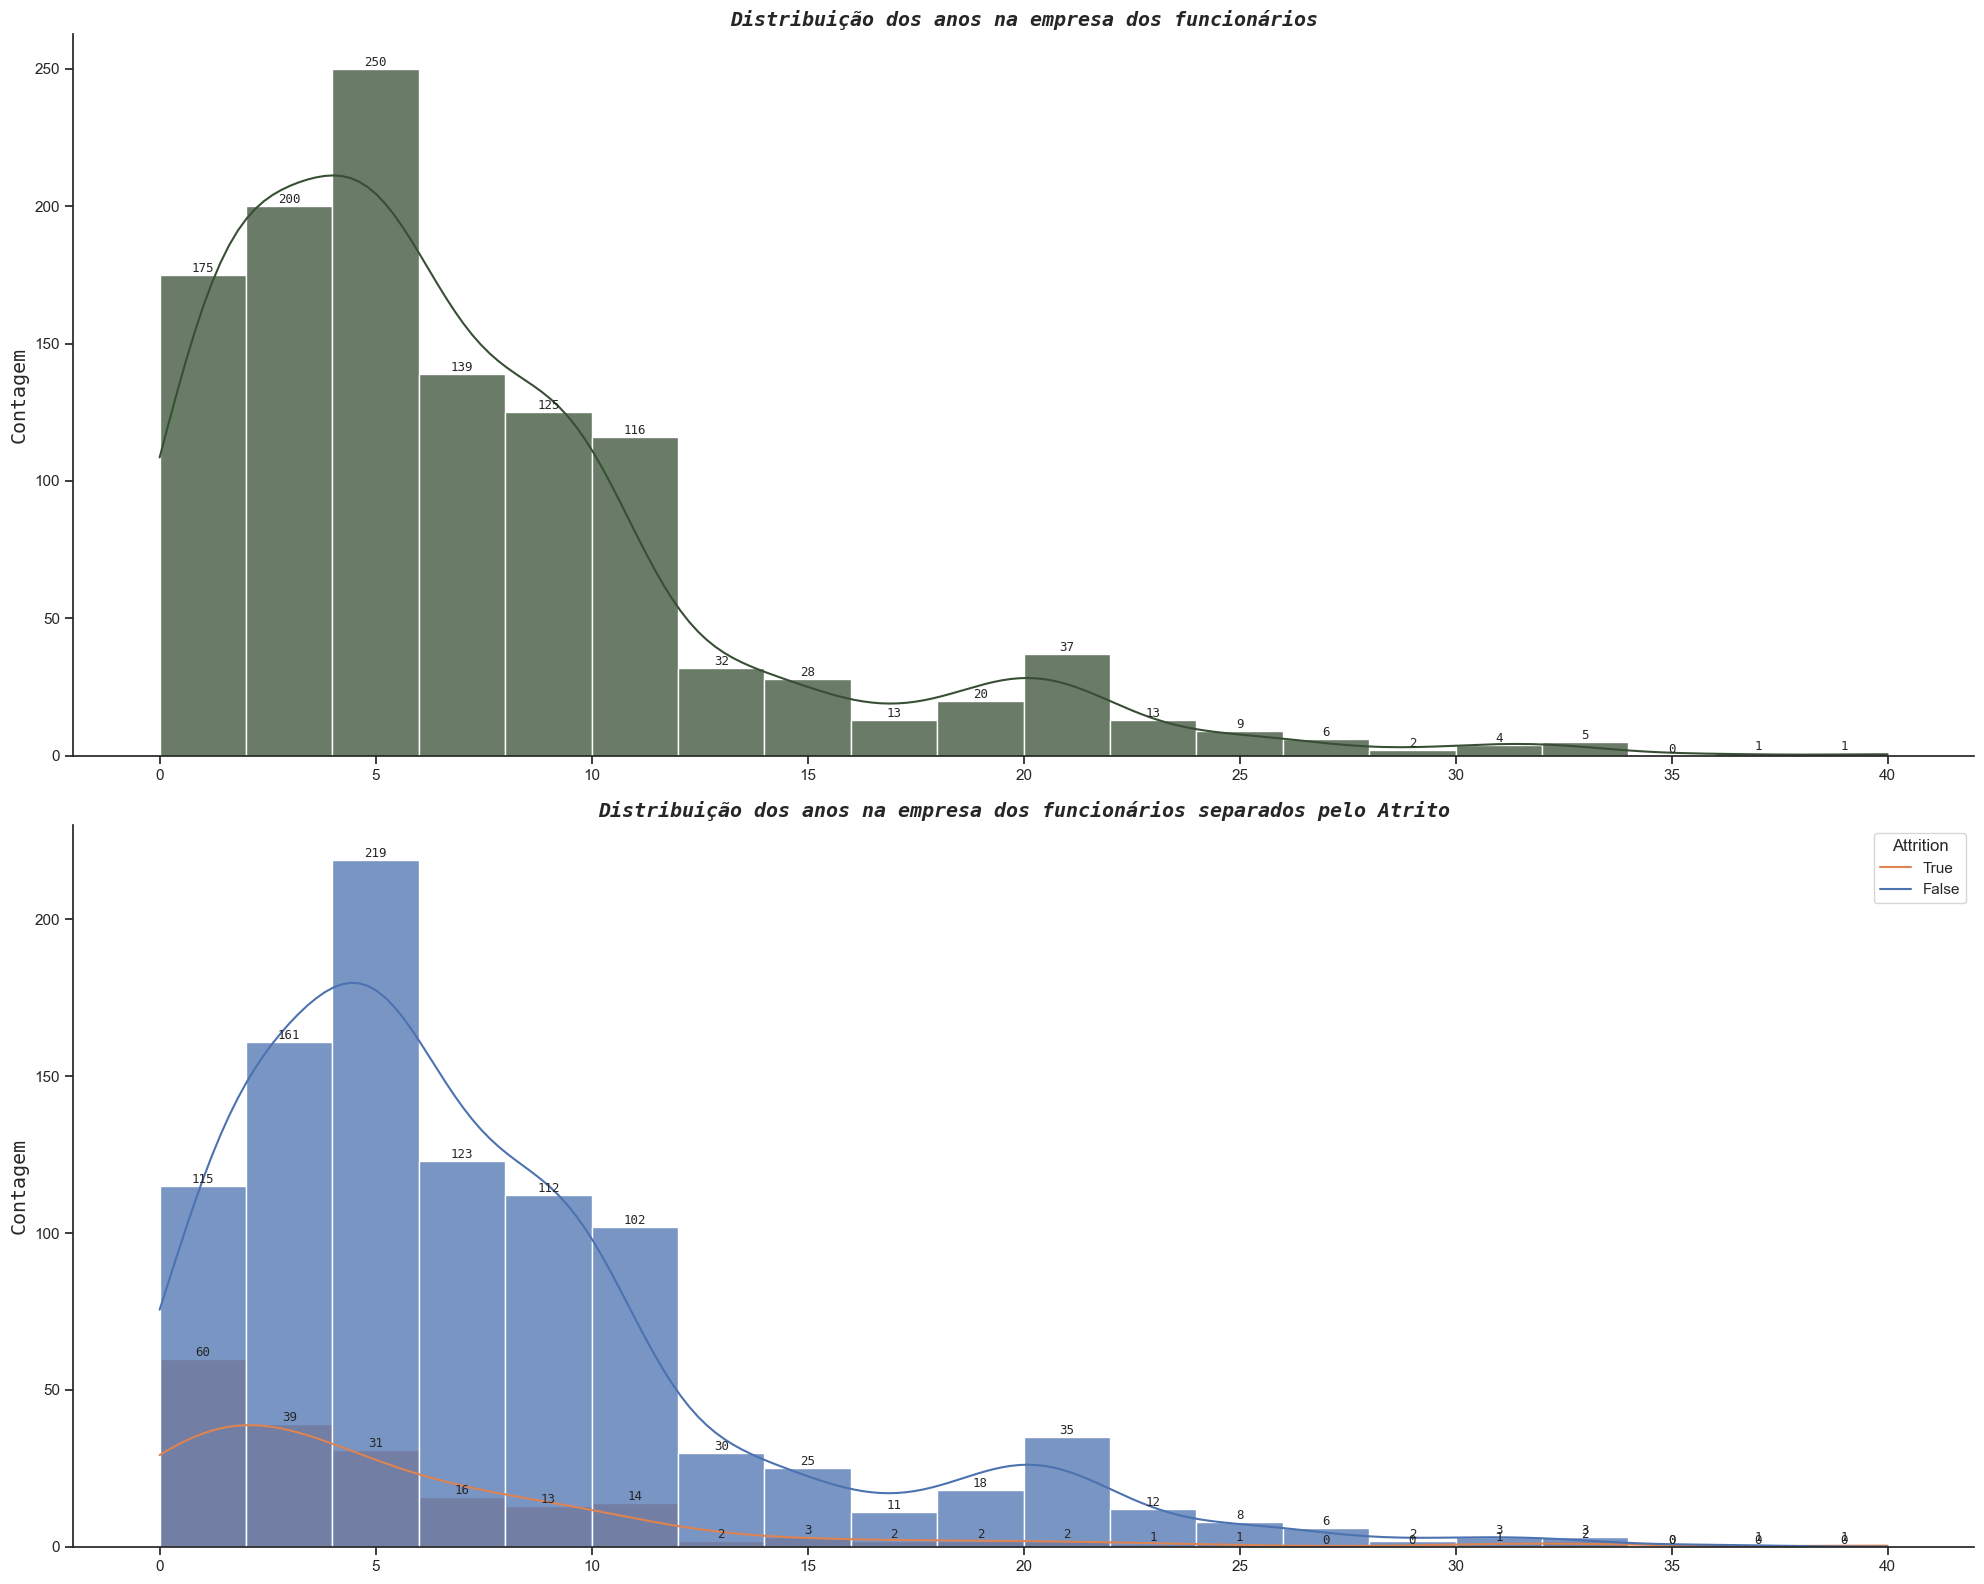

In [219]:
plot_histograms(df, 'years_at_company', 'Distribuição dos anos na empresa dos funcionários')
plt.show()

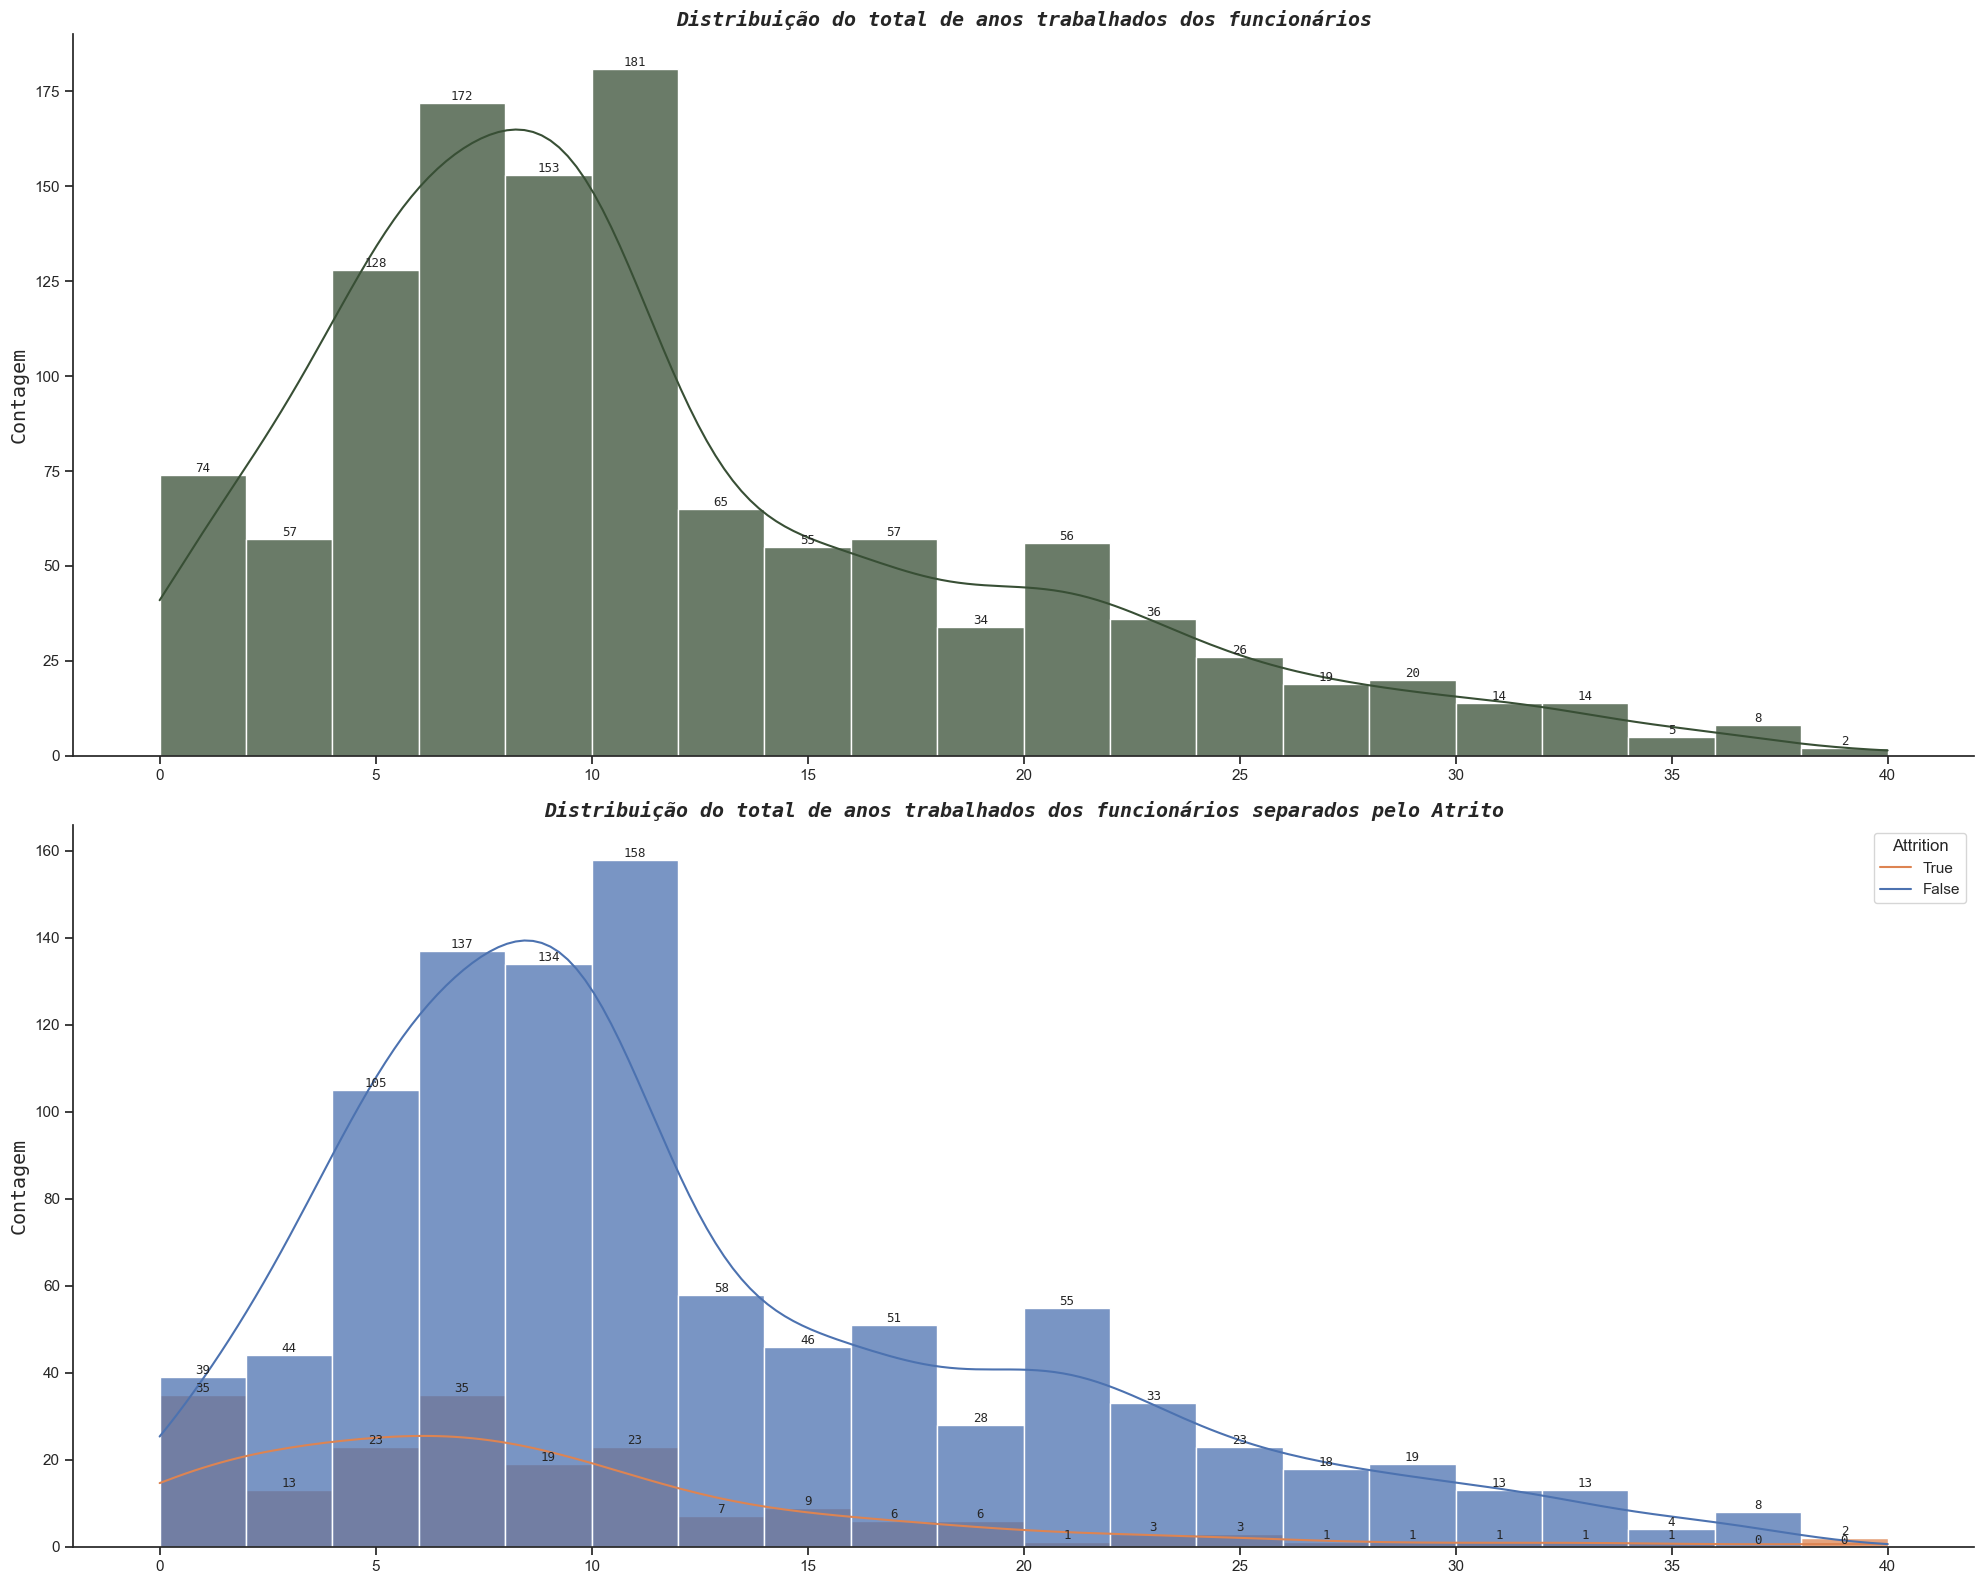

In [220]:
plot_histograms(df, 'total_working_years', 'Distribuição do total de anos trabalhados dos funcionários')
plt.show()

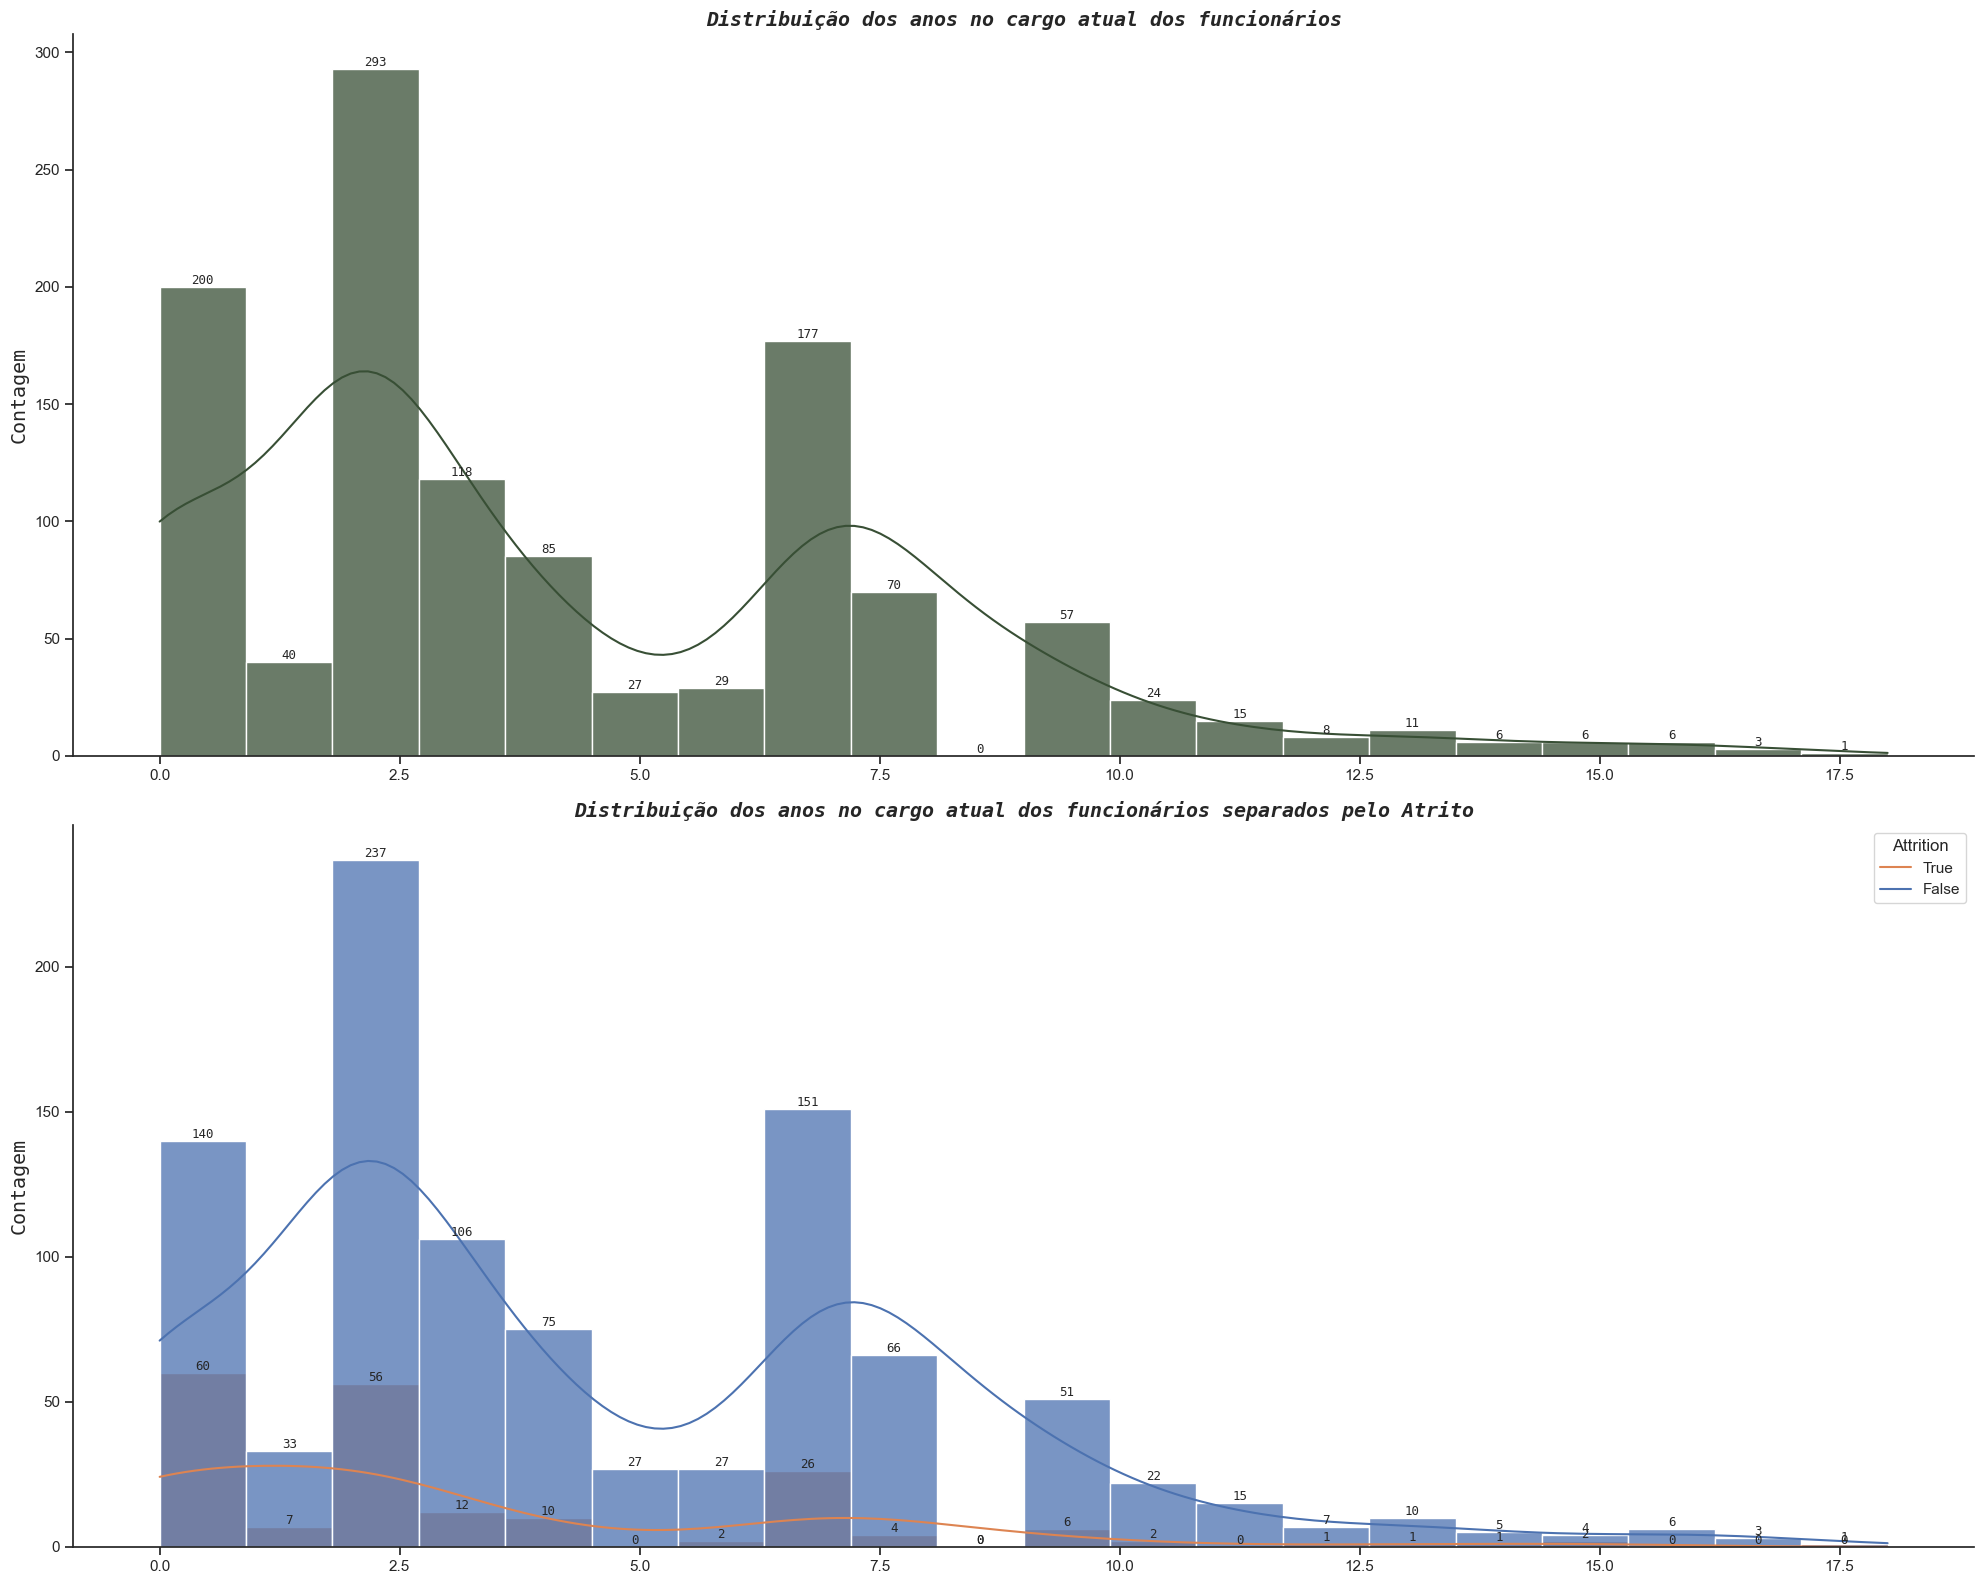

In [221]:
plot_histograms(df, 'years_in_current_role', 'Distribuição dos anos no cargo atual dos funcionários')
plt.show()

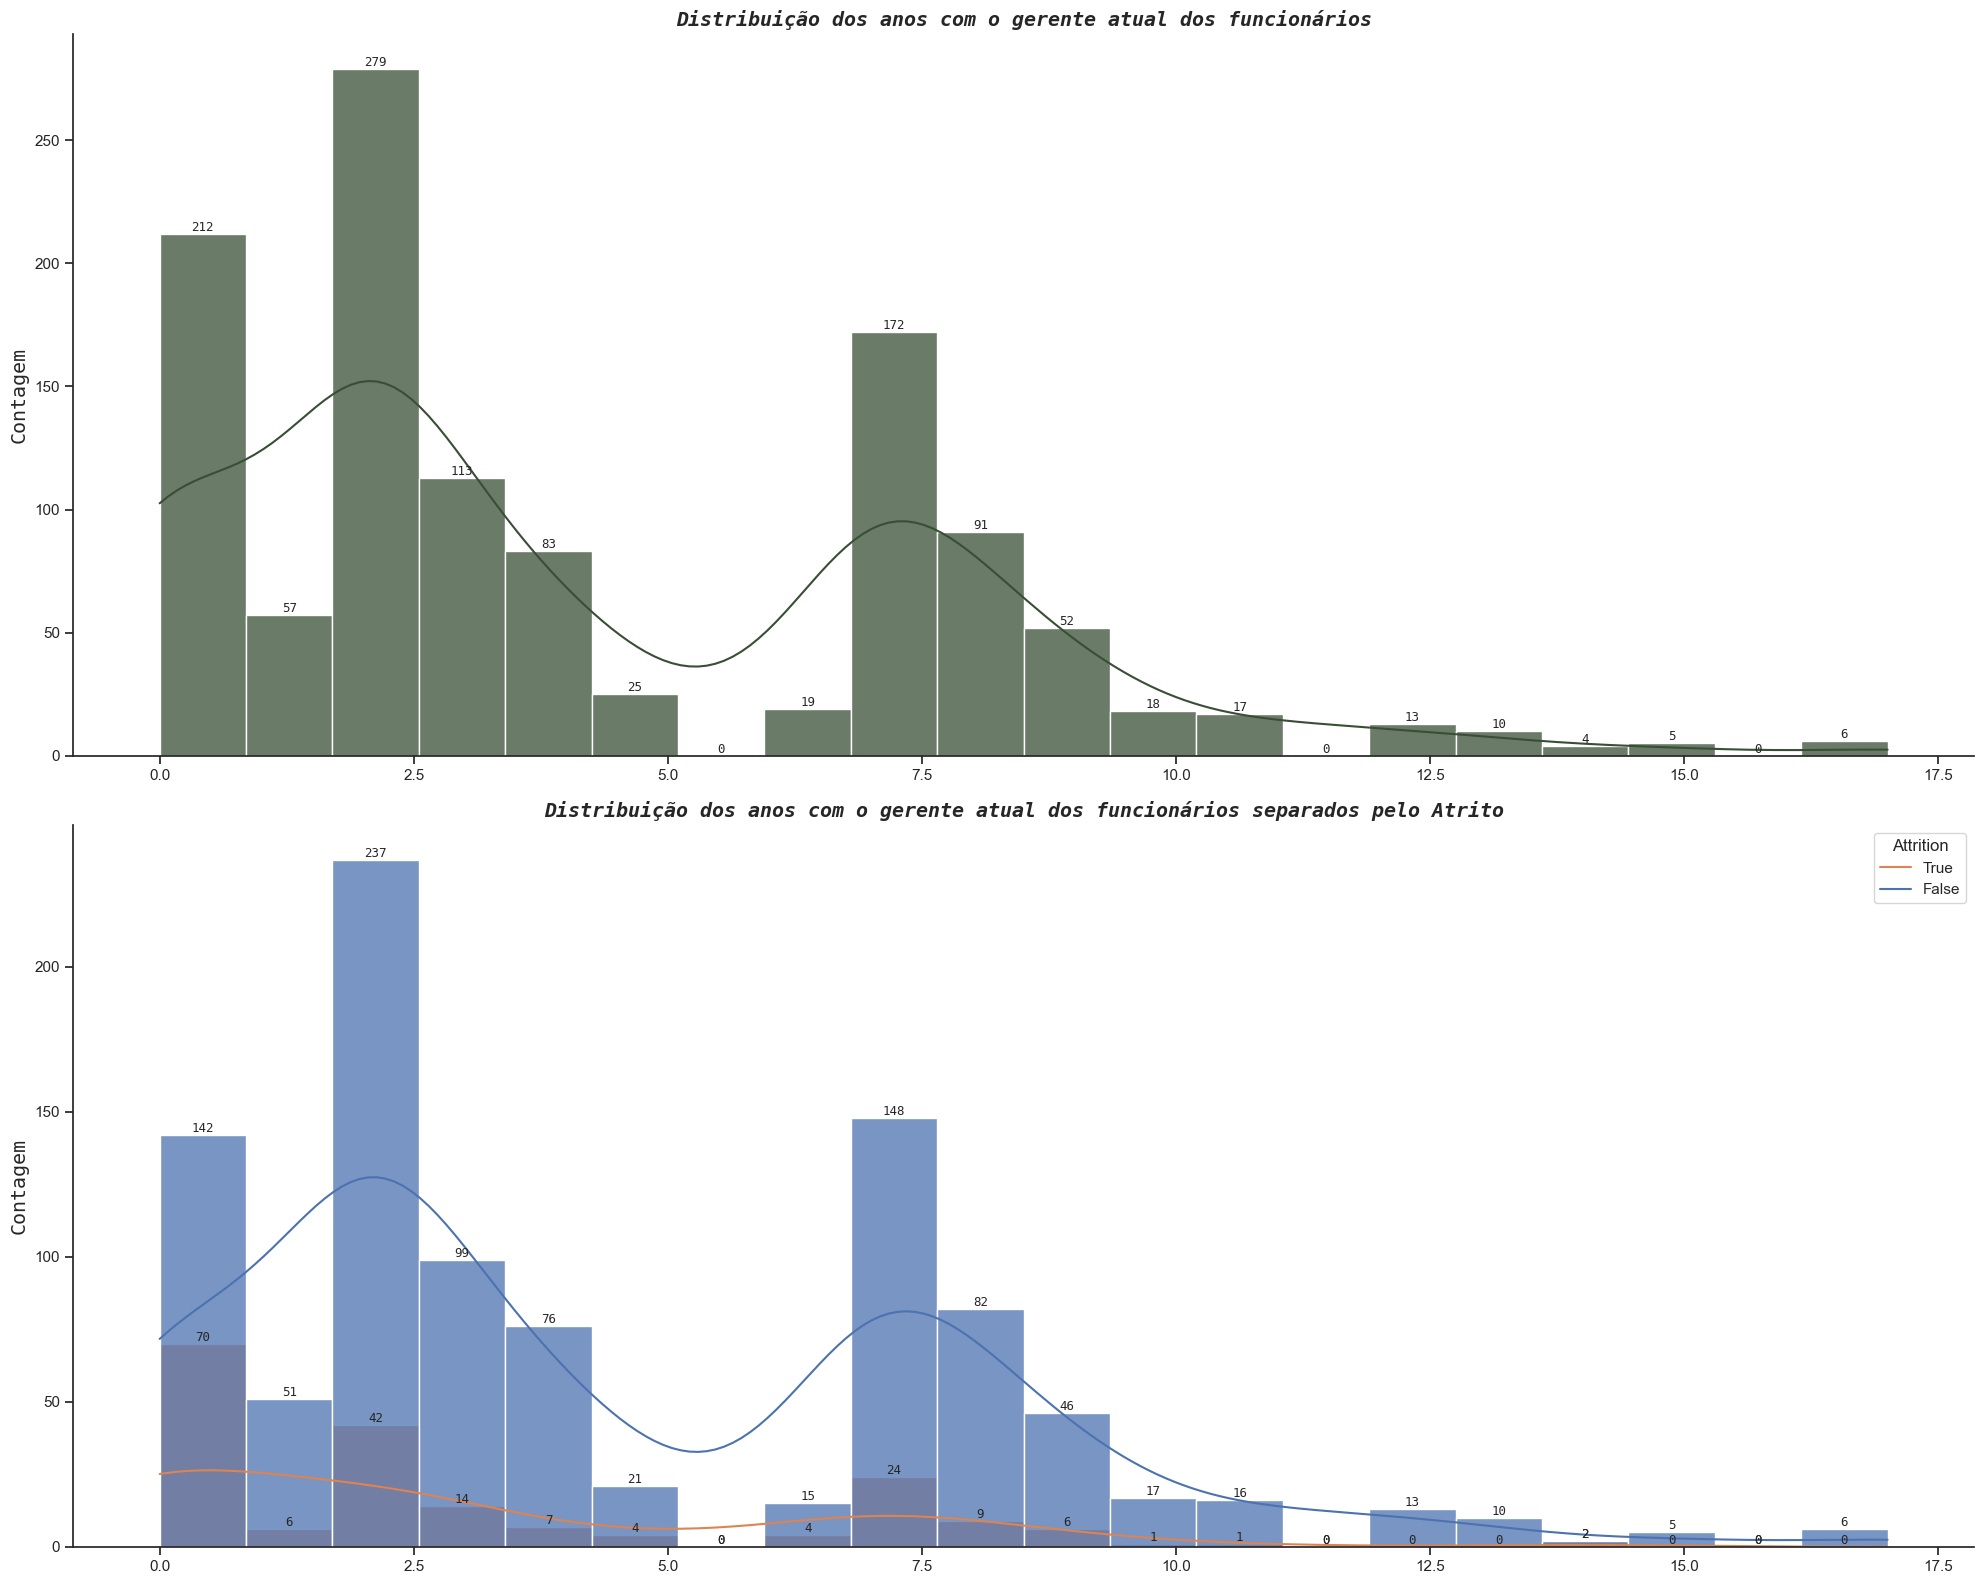

In [222]:
plot_histograms(df, 'years_with_curr_manager', 'Distribuição dos anos com o gerente atual dos funcionários')
plt.show()

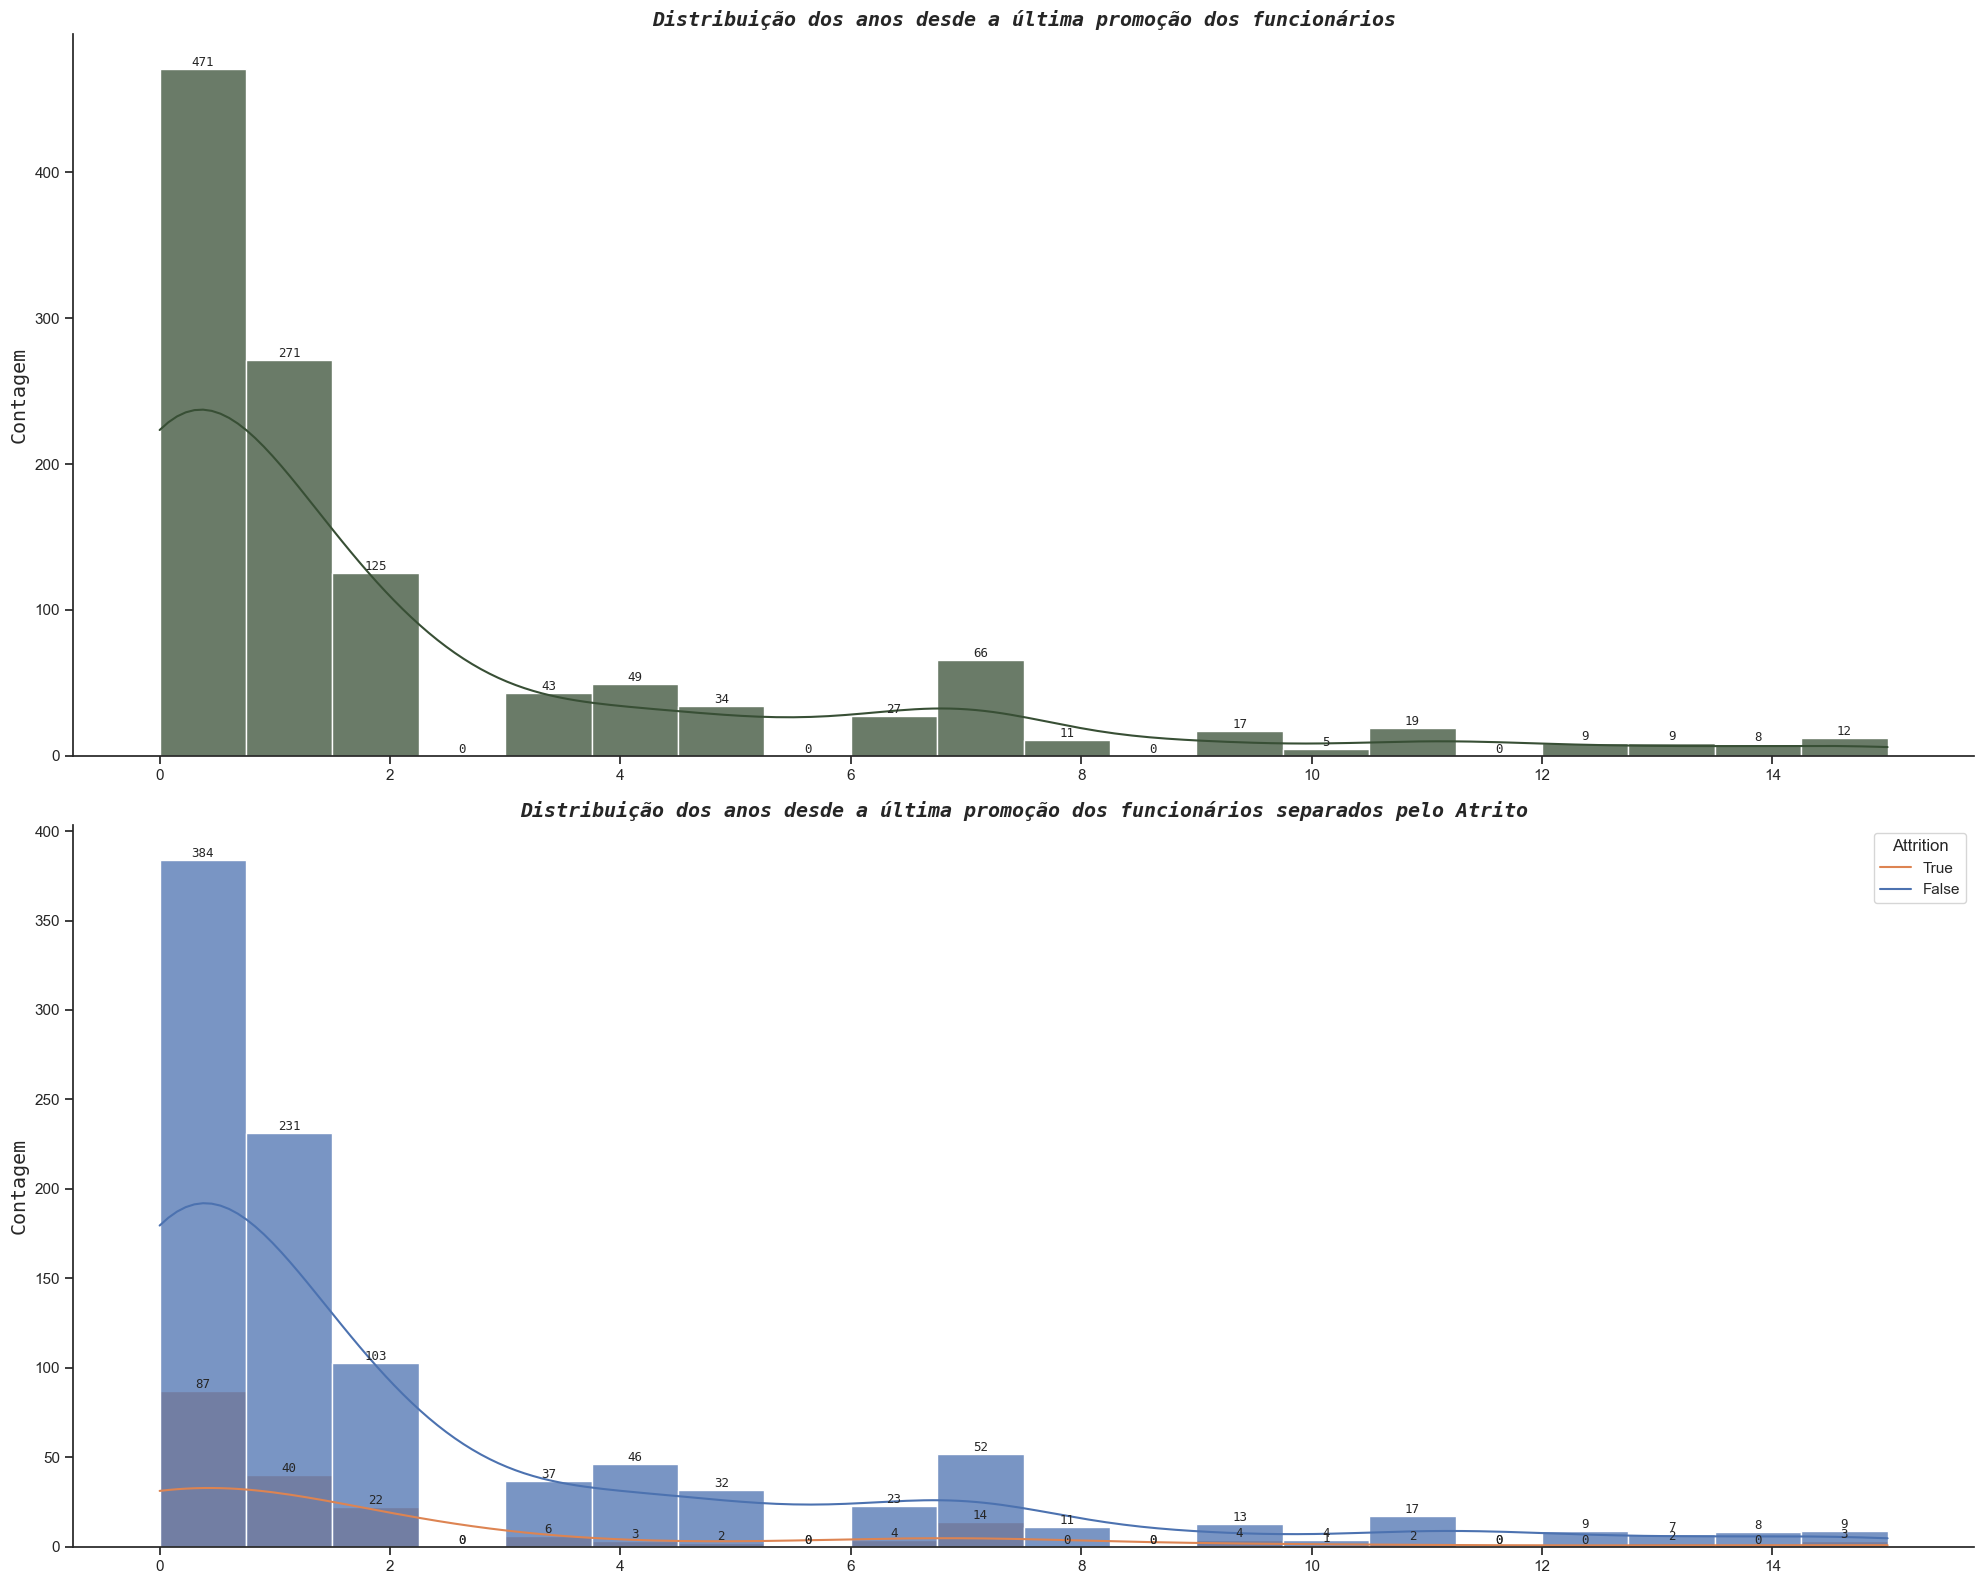

In [223]:
plot_histograms(df, 'years_since_last_promotion', 'Distribuição dos anos desde a última promoção dos funcionários')
plt.show()

## Correlações

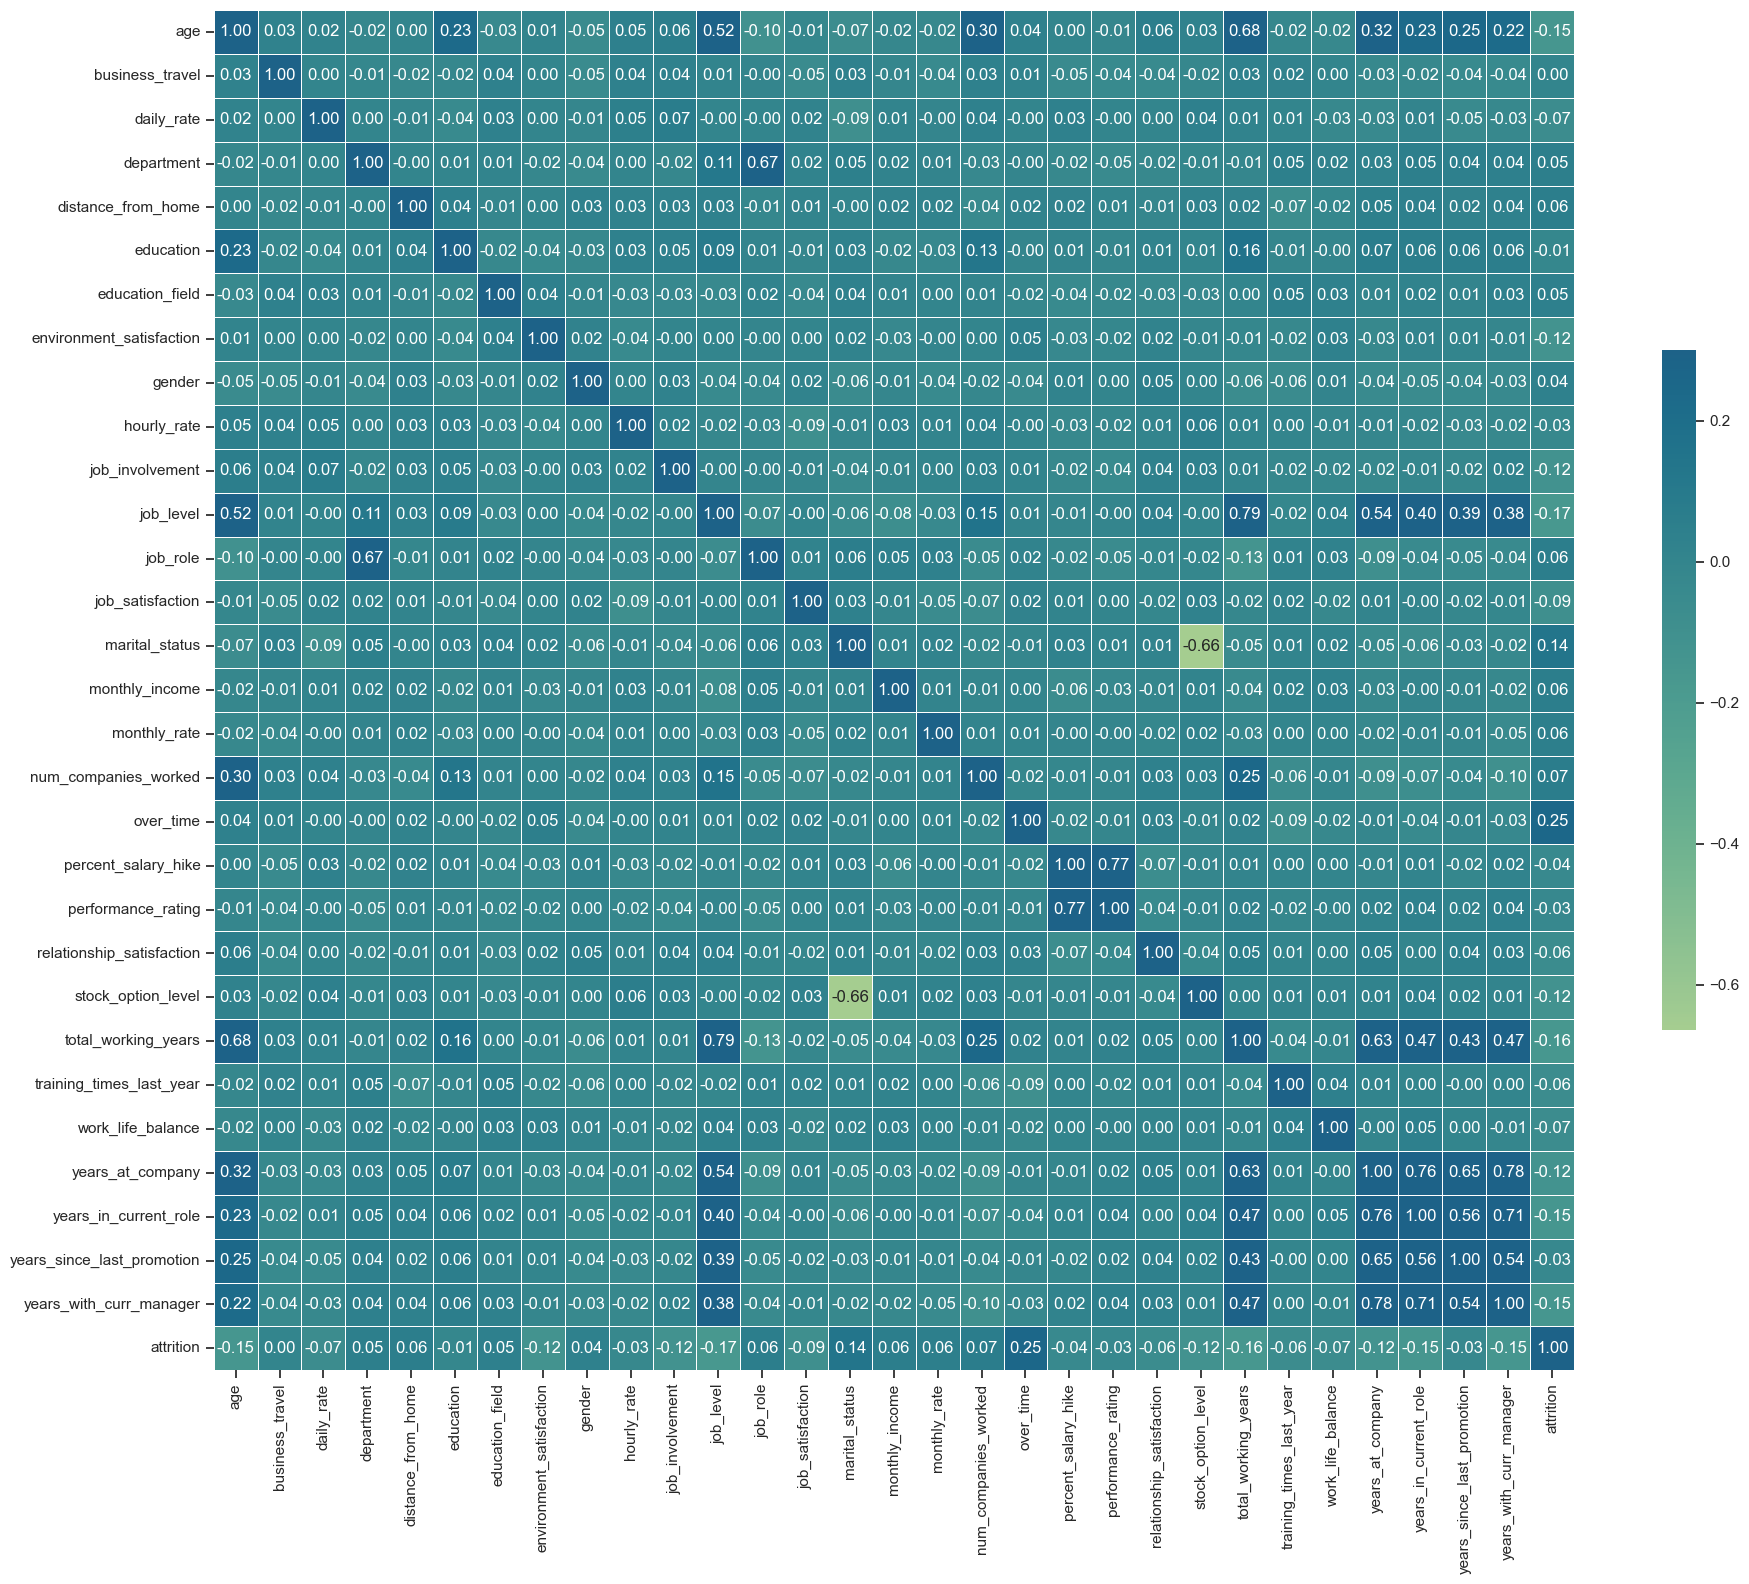

In [229]:
def plot_heatmap(corr: pd.DataFrame, figsize: tuple = (20, 16)) -> None:
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(corr, cmap="crest", vmax=.3, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', ax=ax)
    fig.tight_layout()

corr = df.corr(numeric_only=True, method='pearson')
plot_heatmap(corr, figsize=(20, 16))

plt.show()

In [225]:
corr_to_analysis = []

for item in corr.columns:
    strong_corr = zip(corr[item].abs().sort_values(ascending=False)[1:4].index, corr[item].abs().sort_values(ascending=False)[1:4].values)
    for index, value in strong_corr:
        if value >= 0.75 and ((item, index, value) not in corr_to_analysis or (index, item, value) not in corr_to_analysis):
            corr_to_analysis.append((item, index, value))

In [226]:
corr_to_analysis

[('job_level', 'total_working_years', 0.7944412695440962),
 ('percent_salary_hike', 'performance_rating', 0.7710716931515286),
 ('performance_rating', 'percent_salary_hike', 0.7710716931515286),
 ('total_working_years', 'job_level', 0.7944412695440962),
 ('years_at_company', 'years_with_curr_manager', 0.7762363623180863),
 ('years_at_company', 'years_in_current_role', 0.7585798477303464),
 ('years_in_current_role', 'years_at_company', 0.7585798477303464),
 ('years_with_curr_manager', 'years_at_company', 0.7762363623180863)]

In [227]:
corr.attrition.abs().sort_values(ascending=True)[:4]

business_travel       0.004875
education             0.014302
hourly_rate           0.027314
performance_rating    0.029702
Name: attrition, dtype: float64

In [228]:
corr.attrition.abs().sort_values(ascending=False)[1:5]

over_time                  0.252677
job_level                  0.166499
total_working_years        0.158067
years_with_curr_manager    0.150635
Name: attrition, dtype: float64